# Business Understanding

As a group we decided to use the North Carolina School Report Card data. The North Carolina School Report Card are provided for all North Carolina public, charter, and alternative schools. This data has been made public so parents and others can compare schools, districts, and state level analytics to see how a school is performing. North Carolina offers the data via data set and readymade online SAS analytic reports for less technical users. We are using concatenated versions of this data provided by Professor Drew in 3 data sets: All_Data_By_School_Final, Ec_Pupils_Expanded (2017 Race Compositions by School), and 1516testresults_masking_removed. Here is a breif summary of each data set:

All_Data_By_School_Final - This data set has 2575 records and 293 attributes. Each record is an active school in 2016 from North Carolina. The attributes have been consolidated by Professor Drew from multiple data set from the North Carolina Statistical Profiles and School Report Cards. This enables the attributes to cover a wide spectrum of data for exploration to see what really make one school better than another.  

Ec_Pupils_Expanded (2017 Race Compositions by School) - This data set has 2447 records and 30 attributes. The attributes show the racial count for male and female students that attended the shool. Each record is for an active school in 2017 in North Carolina that choose to measure these metrics. This data can be utilizied to see if racial demographics have an active role in school performance.

1516testresults_masking_removed - This data set has 39857 records and 12 attributes. Each record is a subject per an active school from school year 2015 to 2016, grades 3-8 measureing EOG (end of grade) or EOC (end of course). The attributes are the distribution of students within the student body into a 5-point scale providing a scale for school effectiveness per subject.  


The purpose of this data is to do an exploratory data analysis on the schools of North Carolina and see what are the common characteristics of schools that have higher SPG(School Performance Grades), grades and scores than schools that have lower SPG grades. In North Carolina in 2013 their legislation required that every school receive a SPG A-F letter grade. These grades are based 80% on the school's achievement score, and 20% on the students’ academic growth with a few exceptions. We will use the SPG metrics to rank the schools from low to high performers. The notion behind this purpose is if we can identify a correlation of attributes that high performing SPG schools have, then lower performing schools will know what attributes they are lacking and boosting these attributes can directly increase SPG scores and student education. 

we propose SPG score to be our target variable used to evaluate performance of schools.we have explored reducing a subset of attributes that are of interest and input them to PCA to build the regression model. we also intent to use partial least squares regression for evaluation. we will be evaluating the performance of the model eventually using  MSE and ten-fold cross-validation method.

# Data import and Merging

The first thing we did is merge together all three data sets on the school unit code. Given our three data sets cover 3 different years, 2015 to 2017, and not all the schools measured the same attributes, we understand that there will be some schools that are within one data set and not in another. while running analysis we will have to keep this in mind. This is why there is some duplication for attibutes like school name.  

In [49]:
#Importing the data

#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Reading in raw data
schoolData = pd.read_csv('All_Data_By_School_Final.csv',low_memory=False)
testScores = pd.read_csv('1516testresults_masking_removed.csv', low_memory=False)
raceData = pd.read_csv('EducationDataNC-master/Ec_Pupils_Expanded (2017 Race Compositions by School).csv',low_memory=False)

#looking at the schoolData before merging for validation
schoolData.info()
print('************************************************************') 
print("schoolData ", schoolData.shape)
print("testScores ", testScores.shape)
print("raceData ", raceData.shape)
print('************************************************************')
pd.set_option('display.max_columns', 500)
schoolData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
************************************************************
schoolData  (2579, 293)
testScores  (39857, 12)
raceData  (2446, 30)
************************************************************


,Year,unit_code,street_ad,scity_ad,state_ad,szip_ad,type_cd_txt,Closed_Ind_Text,New_ind_Txt,category_cd,school_type_txt,calendar_only_txt,title1_type_flg,clp_ind_flg,focus_clp_flg,summer_program_flg,asm_no_spg_flg,no_data_spg_flg,esea_status,student_num,lea_avg_student_num,st_avg_student_num,Grad_project_status,stem_flg,Avg_Class_Size_00,Avg_Class_Size_01,Avg_Class_Size_02,Avg_Class_Size_03,Avg_Class_Size_04,Avg_Class_Size_05,Avg_Class_Size_06,Avg_Class_Size_07,Avg_Class_Size_08,Avg_Class_Size_Biology,Avg_Class_Size_EnglishII,Avg_Class_Size_MathI,Avg_Dist_Size_00,Avg_Dist_Size_01,Avg_Dist_Size_02,Avg_Dist_Size_03,Avg_Dist_Size_04,Avg_Dist_Size_05,Avg_Dist_Size_06,Avg_Dist_Size_07,Avg_Dist_Size_08,Avg_Dist_Size_Biology,Avg_Dist_Size_EnglishII,Avg_Dist_Size_MathI,Avg_State_Size_00,Avg_State_Size_01,Avg_State_Size_02,Avg_State_Size_03,Avg_State_Size_04,Avg_State_Size_05,Avg_State_Size_06,Avg_State_Size_07,Avg_State_Size_08,Avg_State_Size_Biology,Avg_State_Size_EnglishII,Avg_State_Size_MathI,total_expense_num,salary_expense_pct,benefits_expense_pct,services_expense_pct,supplies_expense_pct,instruct_equip_exp_pct,other_expense_pct,federal_perpupil_num,local_perpupil_num,state_perpupil_num,lea_total_expense_num,lea_salary_expense_pct,lea_benefits_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,lea_other_expense_pct,lea_federal_perpupil_num,lea_local_perpupil_num,lea_state_perpupil_num,st_total_expense_num,st_salary_expense_pct,st_benefits_expense_pct,st_services_expense_pct,st_supplies_expense_pct,st_instruct_equip_exp_pct,st_other_expense_pct,st_federal_perpupil_num,st_local_perpupil_num,st_state_perpupil_num,SPG Grade,SPG Score,Reading SPG Grade,Reading SPG Score,Math SPG Grade,Math SPG Score,EVAAS Growth Status,EVAAS Growth Score,Overall Achievement Score,Read Score,Math Score,Science Score,Math I Score,English II Score,Biology Score,The ACT Score,ACT WorkKeys Score,Math Course Rigor Score,Cohort Graduation Rate Standard Score,State Gap Compared,GCE_ALL_School_Pct,GCE_LEP_School_Pct,GCE_PRM_School_Pct,GCE_RPF_School_Pct,GCE_SWD_School_Pct,PASSED_EOG_School_Pct,PASSED_LAA_School_Pct,PASSED_RTA_School_Pct,PROMOTED_School_Pct,RETAINED_School_Pct,GCE_ALL_Dist_Pct,GCE_LEP_Dist_Pct,GCE_PRM_Dist_Pct,GCE_RPF_Dist_Pct,GCE_SWD_Dist_Pct,PASSED_EOG_Dist_Pct,PASSED_LAA_Dist_Pct,PASSED_RTA_Dist_Pct,PROMOTED_Dist_Pct,RETAINED_Dist_Pct,GCE_ALL_State_Pct,GCE_LEP_State_Pct,GCE_PRM_State_Pct,GCE_RPF_State_Pct,GCE_SWD_State_Pct,PASSED_EOG_State_Pct,PASSED_LAA_State_Pct,PASSED_RTA_State_Pct,PROMOTED_State_Pct,RETAINED_State_Pct,sat_avg_score_num,lea_sat_avg_score_num,st_sat_avg_score_num,nat_sat_avg_score_num,sat_participation_pct,lea_sat_participation_pct,st_sat_participation_pct,nat_sat_participation_pct,esea_attendance,lea_esea_attendance,ap_participation_pct,lea_ap_participation_pct,st_ap_participation_pct,ap_pct_3_or_above,lea_ap_pct_3_or_above,st_ap_pct_3_or_above,ib_participation_pct,lea_ib_participation_pct,st_ib_participation_pct,ib_pct_4_or_above,lea_ib_pct_4_or_above,st_ib_pct_4_or_above,AP_Courses_Offered,total_specialized_courses,ap_ib_courses,cte_courses,univ_college_courses,lea_total_specialized_courses,lea_ap_ib_courses,lea_cte_courses,lea_univ_college_courses,st_total_specialized_courses,st_ap_ib_courses,st_cte_courses,st_univ_college_courses,sch_percent_college_enrolled_16_mos_post_grad,One_Yr_College_Complete_wi_2_yrs_Enrolled_2012,avg_daily_attend_pct,crime_per_c_num,short_susp_per_c_num,long_susp_per_c_num,expelled_per_c_num,ttl_crimes_num,stud_internet_comp_num,lea_avg_daily_attend_pct,lea_crime_per_c_num,lea_short_susp_per_c_num,lea_long_susp_per_c_num,lea_expelled_per_c_num,lea_stud_internet_comp_num,st_avg_daily_attend_pct,st_crime_per_c_num,st_short_susp_per_c_num,st_long_susp_per_c_num,st_expelled_per_c_num,st_stud_internet_comp_num,digital_media_pct,Byod,grades_BYOD,avg_age_media_collection,1_to_1_access,books_per_student,grades_1_to_1_access,lea_avg_age_media_collection,lea_books_p

In [50]:
#Now going to merge the datasets

#pivot table for merging all Percent GLP for all Subjects of a given School Code (i.e., unit_code)
piv_test = pd.pivot_table(testScores, values='Percent GLP',index=['School Code'],columns='Subject')

#rename pivot table index from School Code to unit_code
piv_test.index.name = 'unit_code'

#append _GLP suffix to GLP score columns of pivot table
piv_test.columns = [str(col) + '_GLP' for col in piv_test.columns]

#reset pivot table index, so unit_code becomes a column (for later merging)
piv_alltest = piv_test.reset_index()

#merge with main data set
schoolData_alltest = schoolData.merge(piv_alltest,how='left',on='unit_code')

#list of race columns from racial composition dataset
racecols = ['Indian Male', 'Indian Female', 'Asian Male',
       'Asian Female', 'Hispanic Male', 'Hispanic Female', 'Black Male',
       'Black Female', 'White Male', 'White Female', 'Pacific Island Male',
       'Pacific Island Female', 'Two or  More Male', 'Two or  More Female',
       'Total', 'White', 'Black', 'Hispanic', 'Indian', 'Asian',
       'Pacific Island', 'Two or More', 'White_Pct', 'Majority_Minority']

#append _RACE suffix to racial composition column names
racecols_renamed = [str(col) + '_RACE' for col in racecols]

#zip together old and new racial composition column names for easy renaming
racecol_rename_dict = {i:j for i,j in zip(racecols,racecols_renamed)}

#rename columns of racial composition dataset so suffixing is evident when subsequently merged
raceData.rename(index=str, columns=racecol_rename_dict,inplace=True)

#ensure that unit_code column is of type string
raceData['unit_code'] = raceData['unit_code'].apply(str)

#append 0's to unit_code values in racial composition dataset, so no duplicates are created when merging (thanks Ranga!)
for i,j in raceData.iterrows():
    
    if len(raceData['unit_code'][i]) == 5: #only unit_code values with less than 5 digits need 0 prefixing to match up in the merge
        raceData.loc[i, 'unit_code'] = '0' + raceData['unit_code'][i]
        
#merge the racial composition dataset with the testScores and main schoolData datasets
schoolData_testRace = schoolData_alltest.merge(raceData,how='left',on='unit_code')

#subset the testScores dataset so that SBE District info can also be merged below
region_df = testScores[['School Code','SBE District']]

#rename the index of the subsetted dataframe so the unit_code column name will match during merging
region_df.rename(index=str, columns={'School Code':'unit_code'},inplace=True)

#drop all the duplicate combinations of column values to ensure no duplicated records are created when merging
region_df_unique = region_df.drop_duplicates()

#merge the subsetted dataframe of only unique column value combinations with the other merged dataframe
schoolData_testRaceRegion = schoolData_testRace.merge(region_df_unique,how='left',on='unit_code')

#check the shape of the resulting totally merged dataframe

print('************************************************************') 
print("schoolData_testRaceRegion ", schoolData_testRaceRegion.shape)

print('************************************************************') 

schoolData_testRaceRegion.head()

#NB: this approach to merging throws a 'SettingWithCopyWarning'

#display all column names if desired
#with pd.option_context('display.max_seq_items', None):
#    print(schoolData_testRaceRegion.columns)


/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


************************************************************
schoolData_testRaceRegion  (2579, 352)
************************************************************


,Year_x,unit_code,street_ad,scity_ad,state_ad,szip_ad,type_cd_txt,Closed_Ind_Text,New_ind_Txt,category_cd,school_type_txt,calendar_only_txt,title1_type_flg,clp_ind_flg,focus_clp_flg,summer_program_flg,asm_no_spg_flg,no_data_spg_flg,esea_status,student_num,lea_avg_student_num,st_avg_student_num,Grad_project_status,stem_flg,Avg_Class_Size_00,Avg_Class_Size_01,Avg_Class_Size_02,Avg_Class_Size_03,Avg_Class_Size_04,Avg_Class_Size_05,Avg_Class_Size_06,Avg_Class_Size_07,Avg_Class_Size_08,Avg_Class_Size_Biology,Avg_Class_Size_EnglishII,Avg_Class_Size_MathI,Avg_Dist_Size_00,Avg_Dist_Size_01,Avg_Dist_Size_02,Avg_Dist_Size_03,Avg_Dist_Size_04,Avg_Dist_Size_05,Avg_Dist_Size_06,Avg_Dist_Size_07,Avg_Dist_Size_08,Avg_Dist_Size_Biology,Avg_Dist_Size_EnglishII,Avg_Dist_Size_MathI,Avg_State_Size_00,Avg_State_Size_01,Avg_State_Size_02,Avg_State_Size_03,Avg_State_Size_04,Avg_State_Size_05,Avg_State_Size_06,Avg_State_Size_07,Avg_State_Size_08,Avg_State_Size_Biology,Avg_State_Size_EnglishII,Avg_State_Size_MathI,total_expense_num,salary_expense_pct,benefits_expense_pct,services_expense_pct,supplies_expense_pct,instruct_equip_exp_pct,other_expense_pct,federal_perpupil_num,local_perpupil_num,state_perpupil_num,lea_total_expense_num,lea_salary_expense_pct,lea_benefits_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,lea_other_expense_pct,lea_federal_perpupil_num,lea_local_perpupil_num,lea_state_perpupil_num,st_total_expense_num,st_salary_expense_pct,st_benefits_expense_pct,st_services_expense_pct,st_supplies_expense_pct,st_instruct_equip_exp_pct,st_other_expense_pct,st_federal_perpupil_num,st_local_perpupil_num,st_state_perpupil_num,SPG Grade,SPG Score,Reading SPG Grade,Reading SPG Score,Math SPG Grade,Math SPG Score,EVAAS Growth Status,EVAAS Growth Score,Overall Achievement Score,Read Score,Math Score,Science Score,Math I Score,English II Score,Biology Score,The ACT Score,ACT WorkKeys Score,Math Course Rigor Score,Cohort Graduation Rate Standard Score,State Gap Compared,GCE_ALL_School_Pct,GCE_LEP_School_Pct,GCE_PRM_School_Pct,GCE_RPF_School_Pct,GCE_SWD_School_Pct,PASSED_EOG_School_Pct,PASSED_LAA_School_Pct,PASSED_RTA_School_Pct,PROMOTED_School_Pct,RETAINED_School_Pct,GCE_ALL_Dist_Pct,GCE_LEP_Dist_Pct,GCE_PRM_Dist_Pct,GCE_RPF_Dist_Pct,GCE_SWD_Dist_Pct,PASSED_EOG_Dist_Pct,PASSED_LAA_Dist_Pct,PASSED_RTA_Dist_Pct,PROMOTED_Dist_Pct,RETAINED_Dist_Pct,GCE_ALL_State_Pct,GCE_LEP_State_Pct,GCE_PRM_State_Pct,GCE_RPF_State_Pct,GCE_SWD_State_Pct,PASSED_EOG_State_Pct,PASSED_LAA_State_Pct,PASSED_RTA_State_Pct,PROMOTED_State_Pct,RETAINED_State_Pct,sat_avg_score_num,lea_sat_avg_score_num,st_sat_avg_score_num,nat_sat_avg_score_num,sat_participation_pct,lea_sat_participation_pct,st_sat_participation_pct,nat_sat_participation_pct,esea_attendance,lea_esea_attendance,ap_participation_pct,lea_ap_participation_pct,st_ap_participation_pct,ap_pct_3_or_above,lea_ap_pct_3_or_above,st_ap_pct_3_or_above,ib_participation_pct,lea_ib_participation_pct,st_ib_participation_pct,ib_pct_4_or_above,lea_ib_pct_4_or_above,st_ib_pct_4_or_above,AP_Courses_Offered,total_specialized_courses,ap_ib_courses,cte_courses,univ_college_courses,lea_total_specialized_courses,lea_ap_ib_courses,lea_cte_courses,lea_univ_college_courses,st_total_specialized_courses,st_ap_ib_courses,st_cte_courses,st_univ_college_courses,sch_percent_college_enrolled_16_mos_post_grad,One_Yr_College_Complete_wi_2_yrs_Enrolled_2012,avg_daily_attend_pct,crime_per_c_num,short_susp_per_c_num,long_susp_per_c_num,expelled_per_c_num,ttl_crimes_num,stud_internet_comp_num,lea_avg_daily_attend_pct,lea_crime_per_c_num,lea_short_susp_per_c_num,lea_long_susp_per_c_num,lea_expelled_per_c_num,lea_stud_internet_comp_num,st_avg_daily_attend_pct,st_crime_per_c_num,st_short_susp_per_c_num,st_long_susp_per_c_num,st_expelled_per_c_num,st_stud_internet_comp_num,digital_media_pct,Byod,grades_BYOD,avg_age_media_collection,1_to_1_access,books_per_student,grades_1_to_1_access,lea_avg_age_media_collection,lea_books

## Data Understanding - Meaning , type, scale and values of important attributes 

We focused on teacher qualifications, different expenses and performance metrics that can be used to find the higher and lower performing schools

 All the attributes below are numeric and of type float64, the SBE District  and SPG Grade is of type object. we are not typecasting anything here.

Below code shows the meaning of each of the attributes in comments and output shows the count of non-missing values for each attribute, thier mean, standard deviation, minimum, 25%, 50%, 75% and maximum value. 


In [51]:
#Picking only columns that we need

cols_needed = ['type_cd_txt',#Charter or public school 
               'school_type_txt',# description of school type.
               'flicensed_teach_pct',#Percent of teachers that meet NC fully licensed definition at school level
               'tchyrs_0thru3_pct',#Percent of Teachers Who Have Taught for 3 Years or Less
               'tchyrs_4thru10_pct',#Percent of Teachers Who Have Taught for 4 - 10 Years
               'tchyrs_11plus_pct',#Percent of Teachers Who Have Taught for more than 11 Years
               'class_teach_num',#Average number of classroom teachers at School Level
               'nbpts_num',#Number of Teachers Who Are National Board Certified
               'advance_dgr_pct',#Average percent of teachers with masters or higher degree 
               '_1yr_tchr_trnovr_pct',#One Year Teacher turnover percentage at school level
               'emer_prov_teach_pct',
               'lateral_teach_pct',# lateral entry teacher percentage at school level.
               'highqual_class_pct',#Percent of highly qualified classes at school level
               'lea_flicensed_teach_pct',##below parameters are same as above counterpart for district level
               'lea_tchyrs_0thru3_pct',
               'lea_tchyrs_4thru10_pct',
               'lea_tchyrs_11plus_pct',
               'lea_class_teach_num',
               'lea_nbpts_num',
               'lea_advance_dgr_pct',
               'lea_1yr_tchr_trnovr_pct',
               'lea_emer_prov_teach_pct',
               'lea_lateral_teach_pct',
               'lea_highqual_class_pct',##
               'lea_highqual_class_hp_pct',#Percent of classes taught by highly qualified teachers in high poverty schools at LEA level
               'lea_highqual_class_lp_pct',#Percent of classes taught by highly qualified teachers in high poverty schools at LEA level
               'lea_highqual_class_all_pct',#Percent of classes taught by highly qualified teachers in all schools at LEA level
               'lea_not_highqual_class_hp_pct',#Percent of classes taught by not highly qualified teachers in high poverty schools at LEA level
               'lea_not_highqual_class_lp_pct',#Percent of classes taught by not highly qualified teachers in low poverty schools at LEA level
               'lea_not_highqual_class_all_pct',#
               'total_expense_num',#Total expense (Dollars Spent) at school level
               'salary_expense_pct',#Percent of expense spent on Salaries at school level 
               'benefits_expense_pct',#Percent of expense spent on Benefits at school level 
               'services_expense_pct',#Percent of expense spent on Services at school level 
               'supplies_expense_pct',#Percent of expense spent on Supplies at school level
               'instruct_equip_exp_pct',#Percent of expense spent on Instructional Equipment at school level 
               'other_expense_pct',#Percent of expense spent on Other Expenses at school level
               'lea_total_expense_num',##Same as above for district level
               'lea_salary_expense_pct',
               'lea_benefits_expense_pct',
               'lea_services_expense_pct',
               'lea_supplies_expense_pct',
               'lea_instruct_equip_exp_pct',
               'lea_other_expense_pct',## District level
               'SPG Grade', #School performance grade
               'SPG Score',#School Performance Grade score value 
               'Reading  SPG Score', 
               'Math SPG Score', 
               'EVAAS Growth Score',#Education Value-Added Assessment System (EVAAS) value added scores
               'Overall Achievement Score',
               'Read Score', 
               'Math Score',
               'Science Score', 
               'Math I Score', 
               'English II Score', 
               'Biology Score', 
               'The ACT Score', 
               'ACT WorkKeys Score', 
               'Math Course Rigor Score',
               'Cohort Graduation Rate Standard Score',
               'SBE District'#State Board of Education Districts - 8 Regions in total
              ]
               
##TBD -   [ASHA - Add more columns based on attributes used in analysis below - esp. from other CSV files]    
keep = [col for col in schoolData_testRaceRegion.columns if col in cols_needed]

NC_data = schoolData_testRaceRegion[keep]
NC_data.info()
NC_data.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Data columns (total 61 columns):
type_cd_txt                              2579 non-null object
school_type_txt                          2579 non-null object
total_expense_num                        160 non-null float64
salary_expense_pct                       160 non-null float64
benefits_expense_pct                     160 non-null float64
services_expense_pct                     160 non-null float64
supplies_expense_pct                     160 non-null float64
instruct_equip_exp_pct                   160 non-null float64
other_expense_pct                        160 non-null float64
lea_total_expense_num                    2419 non-null float64
lea_salary_expense_pct                   2419 non-null float64
lea_benefits_expense_pct                 2419 non-null float64
lea_services_expense_pct                 2419 non-null float64
lea_supplies_expense_pct                 2419 non-null float64
lea_instruct_equip_e

,count,mean,std,min,25%,50%,75%,max
total_expense_num,160.0,9037.196250,2860.954114,6006.190,7672.19000,8358.4700,9593.03750,34879.490
salary_expense_pct,160.0,0.497444,0.098738,0.167,0.45500,0.5150,0.56000,0.729
benefits_expense_pct,160.0,0.130194,0.043848,0.026,0.09675,0.1255,0.16725,0.244
services_expense_pct,160.0,0.266019,0.113998,0.049,0.19350,0.2430,0.31950,0.750
supplies_expense_pct,160.0,0.074700,0.063648,0.022,0.04375,0.0615,0.08900,0.696
instruct_equip_exp_pct,160.0,0.031644,0.062963,0.000,0.00200,0.0100,0.02900,0.434
other_expense_pct,160.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
lea_total_expense_num,2419.0,9048.648780,1004.266922,7974.830,8517.30000,8795.4200,9326.89000,17801.850
lea_salary_expense_pct,2419.0,0.624770,0.018677,0.548,0.61200,0.6260,0.63600,0.658
lea_benefits_expense_pct,2419.0,0.208952,0.006690,0.182,0.20500,0.2100,0.21400,0.222


# Data Quality - Missing Values, Duplicate data and outliers

As seen in the output below, the initial expense related attributes like total, salary expense, benefits, services, supplies, instruction and other expenditures have 93% of missing value. This information is only applicable to charter schools and so we are not going to take any actions since we are going to focus on public schools for analysis.



The district wide expense report for salary, benefits, services, supplies, instruction and equipment expenses had only 6% of the data missing, this will be imputed with the mean of corresponding columns.

SPG Score is the main metric used to measure the performance of the school. A comprehensive explanation on how the SPG score is calculated for North carolina schools is documented in http://www.ncpublicschools.org/src/guide/performance/

 Here's the Grade and points required summary

SchoolPerformanceGrade 

A                         85 - 100 points

B                         70 - 84 points

C                         55 - 69 points

D                         40 - 54 points

F                         less than 40 points

9.9% of the SPG score data is missing in the dataset, schools with no data get no score. For our initial evaluation, we are leaving them as is. 

The Reading SPG, Math SPG, Read and Math scores have 27% missing ,we can impute  these scores with average score

 There are some scores like ACT, Cohort etc that are 80% missing values, we will not be using these scores for any furthur analysis since imputing will not make sense here.

There are several features to identify the teacher experience and quality. The attributes that have ~6% missing values will be imputed with mean, and others are not used for furthur analysis.





In [52]:
#Finding percentage of missing values across each column

import pandas as pd

d1 = NC_data.apply(lambda x: (sum(x.isnull().values)/len(x))*100, axis = 0)
print("\n ****** Percentage of missing values in each attributes ********\n\n",d1)




 ****** Percentage of missing values in each attributes ********

 type_cd_txt                               0.000000
school_type_txt                           0.000000
total_expense_num                        93.796045
salary_expense_pct                       93.796045
benefits_expense_pct                     93.796045
services_expense_pct                     93.796045
supplies_expense_pct                     93.796045
instruct_equip_exp_pct                   93.796045
other_expense_pct                        93.796045
lea_total_expense_num                     6.203955
lea_salary_expense_pct                    6.203955
lea_benefits_expense_pct                  6.203955
lea_services_expense_pct                  6.203955
lea_supplies_expense_pct                  6.203955
lea_instruct_equip_exp_pct                6.203955
lea_other_expense_pct                     6.203955
SPG Grade                                 8.336565
SPG Score                                 9.926328
Reading  SPG S

## Visualizing percentage of missing values of each attribute

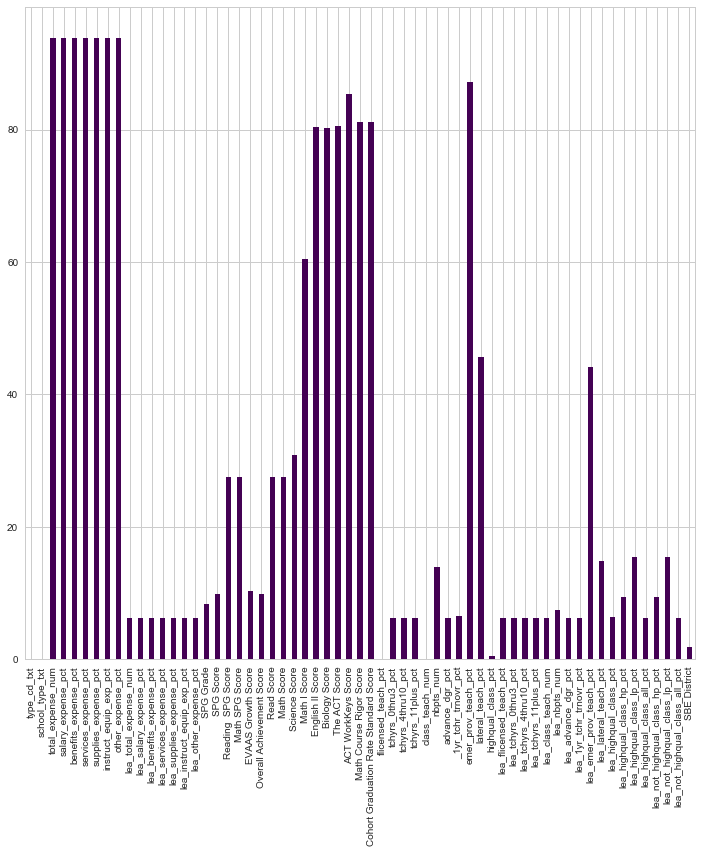

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="whitegrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(12,12))
d1.plot(ax = ax, kind = "bar", cmap = "viridis")


## Imputing missing values with the corresponding mean value of the feature

In [54]:
#district expenses with mean, SPG Grade with 0 if missing

NC_data['lea_total_expense_num'].fillna(NC_data['lea_total_expense_num'].mean(), inplace = True)
NC_data['lea_salary_expense_pct'].fillna(NC_data['lea_salary_expense_pct'].mean(), inplace = True)
NC_data['lea_benefits_expense_pct'].fillna(NC_data['lea_benefits_expense_pct'].mean(), inplace = True)
NC_data['lea_services_expense_pct'].fillna(NC_data['lea_services_expense_pct'].mean(), inplace = True)
NC_data['lea_supplies_expense_pct'].fillna(NC_data['lea_supplies_expense_pct'].mean(), inplace = True)
NC_data['lea_instruct_equip_exp_pct'].fillna(NC_data['lea_instruct_equip_exp_pct'].mean(), inplace = True)
NC_data['lea_other_expense_pct'].fillna(NC_data['lea_other_expense_pct'].mean(), inplace = True)



#Different scores that had missing replaced with mean
NC_data['Reading  SPG Score'].fillna(NC_data['Reading  SPG Score'].mean(), inplace = True) 
NC_data['Math SPG Score'].fillna(NC_data['Math SPG Score'].mean(), inplace = True) 
NC_data['EVAAS Growth Score'].fillna(NC_data['EVAAS Growth Score'].mean(), inplace = True) 
NC_data['Overall Achievement Score'].fillna(NC_data['Overall Achievement Score'].mean(), inplace = True) 
NC_data['Read Score'].fillna(NC_data['Read Score'].mean(), inplace = True) 
NC_data['Math Score'].fillna(NC_data['Math Score'].mean(), inplace = True) 
NC_data['Science Score'].fillna(NC_data['Science Score'].mean(), inplace = True) 



#Teacher features - < 15% missing will be replaced with the mean value
NC_data['flicensed_teach_pct'].fillna(NC_data['flicensed_teach_pct'].mean(), inplace = True)

NC_data['tchyrs_0thru3_pct'].fillna(NC_data['tchyrs_0thru3_pct'].mean(), inplace = True)
NC_data['tchyrs_4thru10_pct'].fillna(NC_data['tchyrs_4thru10_pct'].mean(), inplace = True)
NC_data['tchyrs_11plus_pct'].fillna(NC_data['tchyrs_11plus_pct'].mean(), inplace = True)
NC_data['advance_dgr_pct'].fillna(NC_data['advance_dgr_pct'].mean(), inplace = True)
NC_data['_1yr_tchr_trnovr_pct'].fillna(NC_data['_1yr_tchr_trnovr_pct'].mean(), inplace = True)

NC_data['lea_flicensed_teach_pct'].fillna(NC_data['lea_flicensed_teach_pct'].mean(), inplace = True)
NC_data['lea_tchyrs_0thru3_pct'].fillna(NC_data['lea_tchyrs_0thru3_pct'].mean(), inplace = True)
NC_data['lea_tchyrs_4thru10_pct'].fillna(NC_data['lea_tchyrs_4thru10_pct'].mean(), inplace = True)
NC_data['lea_tchyrs_11plus_pct'].fillna(NC_data['lea_tchyrs_11plus_pct'].mean(), inplace = True)
NC_data['lea_class_teach_num'].fillna(NC_data['lea_class_teach_num'].mean(), inplace = True)
NC_data['lea_nbpts_num'].fillna(NC_data['lea_nbpts_num'].mean(), inplace = True)
NC_data['lea_advance_dgr_pct'].fillna(NC_data['lea_advance_dgr_pct'].mean(), inplace = True)
NC_data['lea_highqual_class_pct'].fillna(NC_data['lea_highqual_class_pct'].mean(), inplace = True)
NC_data['lea_highqual_class_hp_pct'].fillna(NC_data['lea_highqual_class_hp_pct'].mean(), inplace = True)
NC_data['lea_highqual_class_lp_pct'].fillna(NC_data['lea_highqual_class_lp_pct'].mean(), inplace = True)


NC_data['lea_highqual_class_all_pct'].fillna(NC_data['lea_highqual_class_all_pct'].mean(), inplace = True)
NC_data['lea_not_highqual_class_hp_pct'].fillna(NC_data['lea_not_highqual_class_hp_pct'].mean(), inplace = True)
NC_data['lea_not_highqual_class_lp_pct'].fillna(NC_data['lea_not_highqual_class_lp_pct'].mean(), inplace = True)

NC_data['lea_not_highqual_class_all_pct'].fillna(NC_data['lea_not_highqual_class_all_pct'].mean(), inplace = True)

##REmoving the Charter schools.
NC_data = NC_data[NC_data['type_cd_txt'] != 'Charter']

NC_data.info()

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 2 to 2420
Data columns (total 61 columns):
type_cd_txt                              2419 non-null object
school_type_txt                          2419 non-null object
total_expense_num                        0 non-null float64
salary_expense_pct                       0 non-null float64
benefits_expense_pct                     0 non-null float64
services_expense_pct                     0 non-null float64
supplies_expense_pct                     0 non-null float64
instruct_equip_exp_pct                   0 non-null float64
other_expense_pct                        0 non-null float64
lea_total_expense_num                    2419 non-null float64
lea_salary_expense_pct                   2419 non-null float64
lea_benefits_expense_pct                 2419 non-null float64
lea_services_expense_pct                 2419 non-null float64
lea_supplies_expense_pct                 2419 non-null float64
lea_instruct_equip_exp_pct        

## Visualize appropriate statistics (e.g., range, mode, mean, median, variance,counts) for a subset of attributes.

## Average score value for each SPG Grade across all schools

SPG Grade
A       90.113924
A+NG    87.929825
B       75.495146
C       61.927273
D       48.358333
F       34.512605
I             NaN
Name: SPG Score, dtype: float64


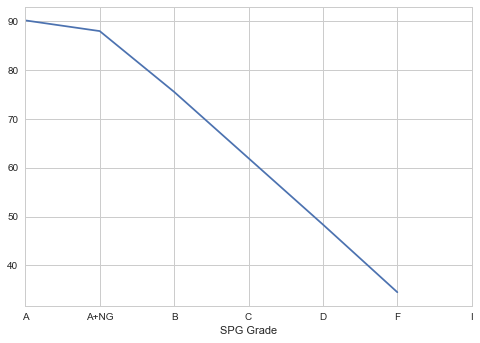

In [55]:
# Visualise how many schools have A,B, C, D and F grade...
import seaborn as sns

score = NC_data.groupby('SPG Grade')['SPG Score'].mean()
print(score)
score.plot()


## mean, std, min, max , range for all the numerical data is checked here.

In [56]:
NC_data.describe().T
df_grouped = NC_data.groupby(by=['SBE District'])
print (df_grouped.describe())

                             ACT WorkKeys Score  Biology Score  \
SBE District                                                     
North Central Region  count           73.000000      91.000000   
                      mean            72.547945      53.065934   
                      std             13.684989      20.299317   
                      min             33.000000      10.000000   
                      25%             64.000000      37.500000   
                      50%             74.000000      52.000000   
                      75%             83.000000      70.500000   
                      max            100.000000      94.000000   
Northeast Region      count           28.000000      34.000000   
                      mean            66.357143      47.147059   
                      std             12.873212      18.949906   
                      min             33.000000      13.000000   
                      25%             62.250000      31.250000   
          

## Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting).

### we had a few areas that looked interesting within the school dataset. One is the average SPG scores per region, another was racial decomposition of different regions , so we did not restrict to only 5 attributes here. 

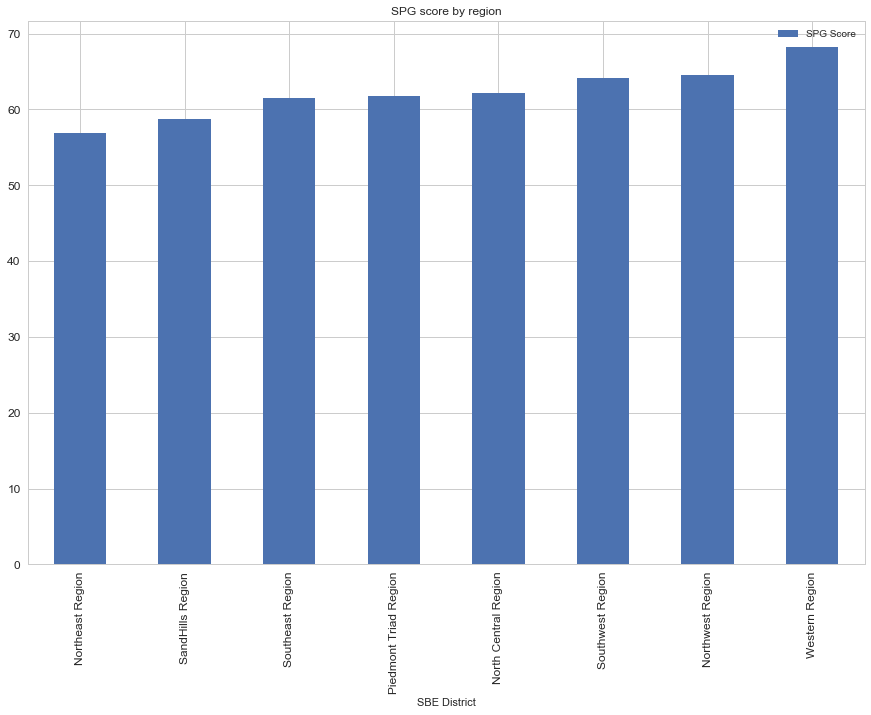

In [57]:
barChart = (schoolData_testRaceRegion.groupby(['SBE District']).agg({'SPG Score':'mean'}))
#barChart.columns = ['SBE District', 'AvgSPGScore']
#.reset_index(name='AvgSPGScore')
barChart

barChart1 = barChart.sort_values('SPG Score')
barChart1
#fig_size = plt.rcParams["figure.figsize"]
barChart1.plot(kind='bar', title ="SPG score by region", figsize=(15, 10), legend=True, fontsize=12)

### Here is a count of number of schools with grade A, A+NG, B, C, D etc per Region

In [58]:
(schoolData_testRaceRegion.groupby(['SBE District', 'SPG Grade']).agg({'SPG Grade':'count'}))

SPG Grade
SBE District          SPG Grade           
North Central Region  A                 17
                      A+NG              21
                      B                127
                      C                192
                      D                123
                      F                 37
Northeast Region      A                  2
                      B                 22
                      C                 61
                      D                 39
                      F                 14
Northwest Region      A                  1
                      A+NG               3
                      B                 43
                      C                 84
                      D                 21
                      F                  1
Piedmont Triad Region A                 15
                      A+NG              14
                      B                 79
                      C                177
                      D                 75
                      F                 27
SandHills Region      A                  8
                      B                 39
                      C                106
                      D                 68
                      F                 19
Southeast Region      A                  9
                      A+NG               5
                      B                 48
                      C                100
                      D                 59
                      F                 11
                      I                  2
Southwest Region      A                 22
                      A+NG              21
                      B                137
                      C                165
                      D                104
                      F                 27
                      I                  2
Western Region        A                  9
                      A+NG               3
                      B                 71
                      C                 81
                      D                 13

## Here's a table of the number of grades grouped by district

In [59]:
barChart2 = (schoolData_testRaceRegion.groupby(['SBE District', 'SPG Grade']).agg({'SPG Grade':'count'})).unstack()
barChart2

SPG Grade                                      
SPG Grade                     A  A+NG      B      C      D     F    I
SBE District                                                         
North Central Region       17.0  21.0  127.0  192.0  123.0  37.0  NaN
Northeast Region            2.0   NaN   22.0   61.0   39.0  14.0  NaN
Northwest Region            1.0   3.0   43.0   84.0   21.0   1.0  NaN
Piedmont Triad Region      15.0  14.0   79.0  177.0   75.0  27.0  NaN
SandHills Region            8.0   NaN   39.0  106.0   68.0  19.0  NaN
Southeast Region            9.0   5.0   48.0  100.0   59.0  11.0  2.0
Southwest Region           22.0  21.0  137.0  165.0  104.0  27.0  2.0
Western Region              9.0   3.0   71.0   81.0   13.0   NaN  NaN

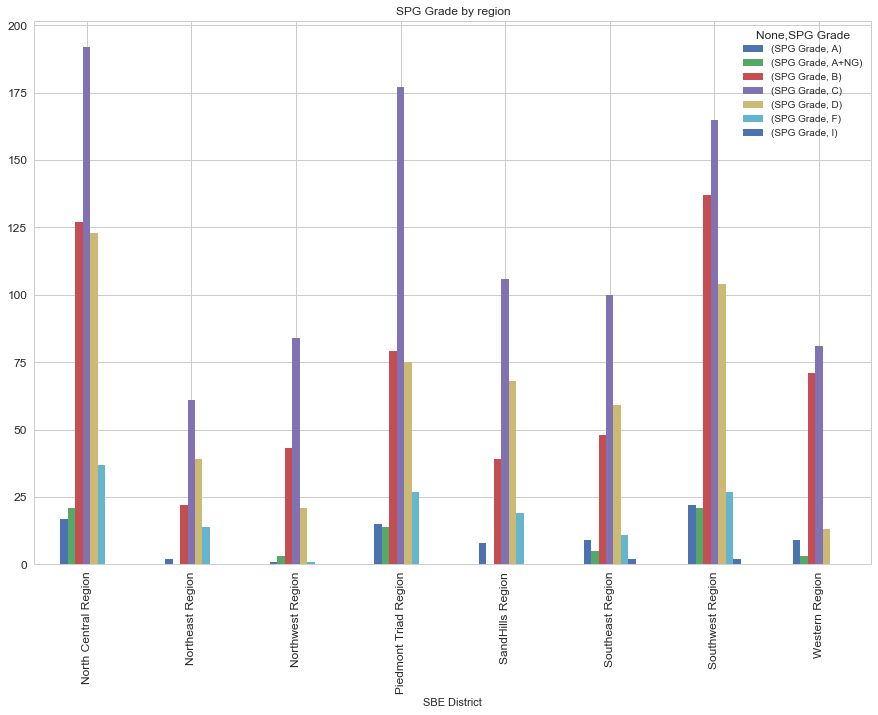

In [60]:
barChart2.plot(kind='bar', title ="SPG Grade by region", figsize=(15, 10), legend=True, fontsize=12)

## Above visualization shows the number of grades per region. This is not very useful to get comparison data so we created another chart below that shows more comparable ratio of percentage of schools that obtained A, B, C etc grades in each region

## Looking at the table below we see that the North east has 10% of the F grades(FPerc) and western region has 0% of F

In [61]:
dist_df = schoolData_testRaceRegion[['SBE District', 'SPG Grade']]

In [62]:
from numpy import *
bar2 = dist_df.groupby(['SBE District', 'SPG Grade']).size().unstack()
where_are_NaNs = isnan(bar2)
bar2[where_are_NaNs] = 0
bar2['Total'] = bar2['A']+bar2['A+NG']+bar2['B']+bar2['C']+bar2['D']+bar2['F']+bar2['I']
bar2['APerc'] = (bar2['A'] / bar2['Total'])*100
bar2['A+NGPerc'] = (bar2['A+NG'] / bar2['Total'])*100
bar2['BPerc'] = (bar2['B'] / bar2['Total'])*100
bar2['CPerc'] = (bar2['C'] / bar2['Total'])*100
bar2['DPerc'] = (bar2['D'] / bar2['Total'])*100
bar2['FPerc'] = (bar2['F'] / bar2['Total'])*100
bar2['IPerc'] = (bar2['I'] / bar2['Total'])*100
bar2

SPG Grade,A,A+NG,B,C,D,F,I,Total,APerc,A+NGPerc,BPerc,CPerc,DPerc,FPerc,IPerc
SBE District,,,,,,,,,,,,,,,
North Central Region,17.0,21.0,127.0,192.0,123.0,37.0,0.0,517.0,3.288201,4.061896,24.564797,37.137331,23.791103,7.156673,0.000000
Northeast Region,2.0,0.0,22.0,61.0,39.0,14.0,0.0,138.0,1.449275,0.000000,15.942029,44.202899,28.260870,10.144928,0.000000
Northwest Region,1.0,3.0,43.0,84.0,21.0,1.0,0.0,153.0,0.653595,1.960784,28.104575,54.901961,13.725490,0.653595,0.000000
Piedmont Triad Region,15.0,14.0,79.0,177.0,75.0,27.0,0.0,387.0,3.875969,3.617571,20.413437,45.736434,19.379845,6.976744,0.000000
SandHills Region,8.0,0.0,39.0,106.0,68.0,19.0,0.0,240.0,3.333333,0.000000,16.250000,44.166667,28.333333,7.916667,0.000000
Southeast Region,9.0,5.0,48.0,100.0,59.0,11.0,2.0,234.0,3.846154,2.136752,20.512821,42.735043,25.213675,4.700855,0.854701
Southwest Region,22.0,21.0,137.0,165.0,104.0,27.0,2.0,478.0,4.602510,4.393305,28.661088,34.518828,21.757322,5.648536,0.418410
Western Region,9.0,3.0,71.0,81.0,13.0,0.0,0.0,177.0,5.084746,1.694915,40.112994,45.762712,7.344633,0.000000,0.000000


In [63]:
gradeRegionPlot = bar2
gradeRegionPlot.drop('A', axis=1, inplace=True)
gradeRegionPlot.drop('A+NG', axis=1, inplace=True)
gradeRegionPlot.drop('B', axis=1, inplace=True)
gradeRegionPlot.drop('C', axis=1, inplace=True)
gradeRegionPlot.drop('D', axis=1, inplace=True)
gradeRegionPlot.drop('F', axis=1, inplace=True)
gradeRegionPlot.drop('I', axis=1, inplace=True)
gradeRegionPlot.drop('Total', axis=1, inplace=True)
gradeRegionPlot

SPG Grade,APerc,A+NGPerc,BPerc,CPerc,DPerc,FPerc,IPerc
SBE District,,,,,,,
North Central Region,3.288201,4.061896,24.564797,37.137331,23.791103,7.156673,0.000000
Northeast Region,1.449275,0.000000,15.942029,44.202899,28.260870,10.144928,0.000000
Northwest Region,0.653595,1.960784,28.104575,54.901961,13.725490,0.653595,0.000000
Piedmont Triad Region,3.875969,3.617571,20.413437,45.736434,19.379845,6.976744,0.000000
SandHills Region,3.333333,0.000000,16.250000,44.166667,28.333333,7.916667,0.000000
Southeast Region,3.846154,2.136752,20.512821,42.735043,25.213675,4.700855,0.854701
Southwest Region,4.602510,4.393305,28.661088,34.518828,21.757322,5.648536,0.418410
Western Region,5.084746,1.694915,40.112994,45.762712,7.344633,0.000000,0.000000


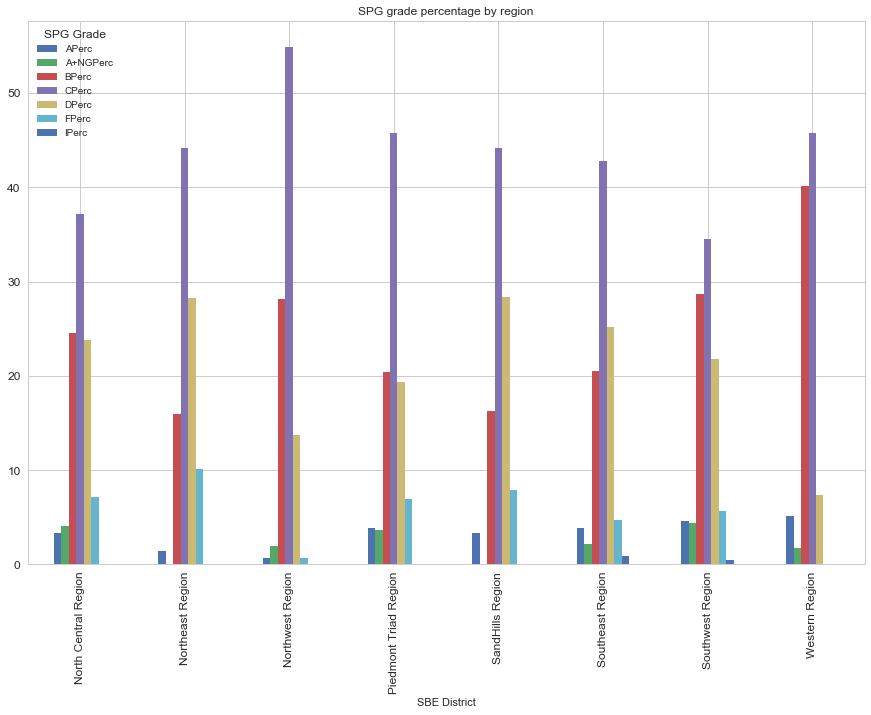

In [64]:
gradeRegionPlot.plot(kind='bar', title ="SPG grade percentage by region", figsize=(15, 10), legend=True, fontsize=12)

## Another feature - Racial decomposition per region

### we tried to look at the different races in each region so that we could later analyse if the racial decomposition has a role to play in the success of the school. The detail analysis may however be next lab assigment.

In [65]:
distRaceData = (schoolData_testRaceRegion.groupby(['SBE District']).agg({'White_RACE':'mean', 'Black_RACE':'mean', 'Hispanic_RACE':'mean','Indian_RACE':'mean','Asian_RACE':'mean','Pacific Island_RACE':'mean','Two or More_RACE':'mean'}))
distRaceData

,White_RACE,Black_RACE,Hispanic_RACE,Indian_RACE,Asian_RACE,Pacific Island_RACE,Two or More_RACE
SBE District,,,,,,,
North Central Region,303.353183,195.811088,137.404517,2.708419,33.934292,0.716632,26.043121
Northeast Region,187.357143,189.610390,40.863636,2.051948,4.064935,0.441558,16.564935
Northwest Region,328.304348,22.760870,63.250000,0.744565,13.869565,0.266304,19.222826
Piedmont Triad Region,279.836930,137.930456,109.364508,1.824940,17.083933,0.599520,22.645084
SandHills Region,172.905138,181.205534,83.703557,52.462451,5.778656,1.355731,28.897233
Southeast Region,319.856522,139.808696,95.630435,2.386957,8.769565,1.108696,28.143478
Southwest Region,337.995726,195.747863,129.790598,2.371795,29.630342,0.743590,23.880342
Western Region,346.233918,27.619883,63.976608,7.052632,4.584795,1.233918,19.561404


In [66]:
distRaceData['Total'] = distRaceData['White_RACE']+distRaceData['Black_RACE']+distRaceData['Hispanic_RACE']+distRaceData['Indian_RACE']+distRaceData['Asian_RACE']+distRaceData['Pacific Island_RACE']+distRaceData['Two or More_RACE']

In [67]:
distRaceData['White_Race_Percent'] = (distRaceData['White_RACE']/distRaceData['Total'])*100
distRaceData['Black_Race_Percent'] = (distRaceData['Black_RACE']/distRaceData['Total'])*100
distRaceData['Hispanic_Race_Percent'] = (distRaceData['Hispanic_RACE']/distRaceData['Total'])*100
distRaceData['Indian_Race_Percent'] = (distRaceData['Indian_RACE']/distRaceData['Total'])*100
distRaceData['Asian_Race_Percent'] = (distRaceData['Asian_RACE']/distRaceData['Total'])*100
distRaceData['Pacific Island_Race_Percent'] = (distRaceData['Pacific Island_RACE']/distRaceData['Total'])*100
distRaceData['Two or More_Race_Percent'] = (distRaceData['Two or More_RACE']/distRaceData['Total'])*100
distRaceDataPlot = distRaceData
distRaceDataPlot.drop('White_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Black_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Hispanic_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Indian_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Asian_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Pacific Island_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Two or More_RACE', axis=1, inplace=True)
distRaceDataPlot.drop('Total', axis=1, inplace=True)
distRaceDataPlot

,White_Race_Percent,Black_Race_Percent,Hispanic_Race_Percent,Indian_Race_Percent,Asian_Race_Percent,Pacific Island_Race_Percent,Two or More_Race_Percent
SBE District,,,,,,,
North Central Region,43.337949,27.974161,19.630023,0.386933,4.847955,0.102380,3.720599
Northeast Region,42.488992,42.999985,9.267086,0.465342,0.921849,0.100137,3.756608
Northwest Region,73.213831,5.075810,14.105128,0.166042,3.092996,0.059387,4.286805
Piedmont Triad Region,49.155827,24.228702,19.210841,0.320567,3.000944,0.105311,3.977809
SandHills Region,32.852444,34.429541,15.903902,9.968007,1.097960,0.257593,5.490552
Southeast Region,53.693837,23.469477,16.053338,0.400695,1.472134,0.186115,4.724404
Southwest Region,46.933405,27.181153,18.022461,0.329343,4.114409,0.103253,3.315976
Western Region,73.625567,5.873282,13.604427,1.499720,0.974942,0.262389,4.159672


### The white race is predominantly higher than other races across all regions. 
### In Western and Northwest region, the white race is the maximum.  The Indian race is only seen predominantly in the sandHills region, there are a few in western region as well.
### Hispanic is spread out through all the regions. Asians  are seen more in North central, North west, Piedmont and southwest regions.


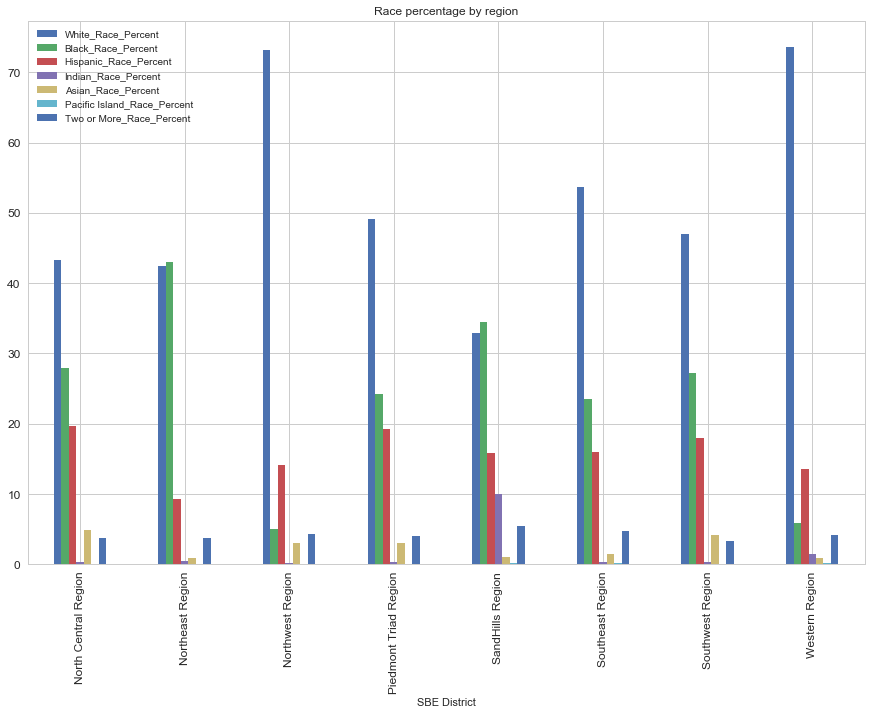

In [68]:
distRaceDataPlot.plot(kind='bar', title ="Race percentage by region", figsize=(15, 10), legend=True, fontsize=12)

## Analysis of the teacher qualification per region

In [69]:
distQualifiedTeacher = schoolData_testRaceRegion[['SBE District', 'flicensed_teach_pct', 'advance_dgr_pct', 'highqual_class_pct', 'st_flicensed_teach_pct', 'st_advance_dgr_pct', 'st_highqual_class_pct']]
distQualifiedTeacher

,SBE District,flicensed_teach_pct,advance_dgr_pct,highqual_class_pct,st_flicensed_teach_pct,st_advance_dgr_pct,st_highqual_class_pct
0,Southwest Region,0.893,NaN,0.872,0.808,0.277,0.820
1,North Central Region,0.800,NaN,0.909,0.895,0.262,0.894
2,Piedmont Triad Region,1.000,0.143,0.964,0.897,0.248,0.964
3,Piedmont Triad Region,0.958,0.194,1.000,0.975,0.285,0.982
4,Piedmont Triad Region,1.000,0.529,1.000,0.975,0.285,0.982
5,Piedmont Triad Region,0.835,0.230,0.981,0.923,0.268,0.962
6,NaN,0.800,0.067,NaN,0.897,0.248,0.964
7,Piedmont Triad Region,0.956,0.370,1.000,0.975,0.285,0.982
8,Piedmont Triad Region,1.000,0.357,0.952,0.975,0.285,0.982
9,Piedmont Triad Region,0.942,0.143,0.860,0.897,0.248,0.964


In [70]:

distTeacherData = (distQualifiedTeacher.groupby(['SBE District']).agg({'flicensed_teach_pct':'mean', 'advance_dgr_pct':'mean', 'highqual_class_pct':'mean','st_flicensed_teach_pct':'mean','st_advance_dgr_pct':'mean','st_highqual_class_pct':'mean'}))

distTeacherData

,flicensed_teach_pct,advance_dgr_pct,highqual_class_pct,st_flicensed_teach_pct,st_advance_dgr_pct,st_highqual_class_pct
SBE District,,,,,,
North Central Region,0.925557,0.301565,0.949602,0.939504,0.273641,0.964252
Northeast Region,0.889232,0.253310,0.942451,0.933811,0.271500,0.963134
Northwest Region,0.979323,0.310016,0.971053,0.937635,0.273254,0.961540
Piedmont Triad Region,0.942302,0.294597,0.969198,0.938453,0.273872,0.964570
SandHills Region,0.911762,0.247103,0.941908,0.940561,0.273508,0.966389
Southeast Region,0.938708,0.256035,0.957514,0.939156,0.272728,0.965235
Southwest Region,0.928356,0.230386,0.969884,0.939784,0.274244,0.964381
Western Region,0.955989,0.311250,0.969005,0.932946,0.271686,0.959995


## From the above table and visualization below, we see that 'flicensed_teachers' - Percent of teachers that meet NC fully licensed definition at school level is highest in the Western region and lowest in the northeast region

## Also percentage of advanced degree teachers are highest in northwest and western region and lowest in sandhills, southwest and northeast regions. 

## we will do furthur analysis to see if there is a correlation between performance of the schools and the teacher qualification differences. 

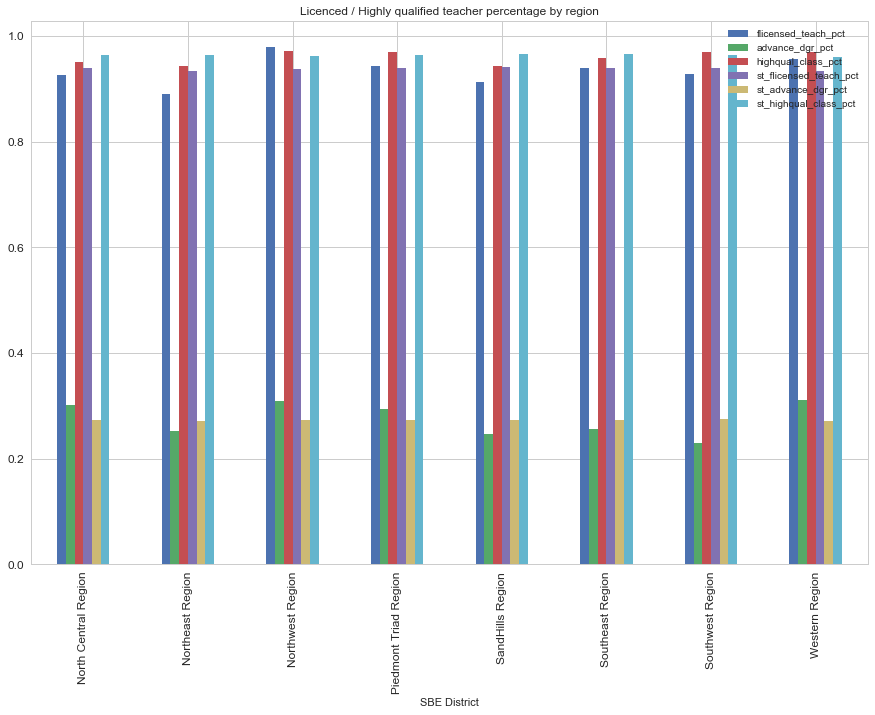

In [71]:
distTeacherData.plot(kind='bar', title ="Licenced / Highly qualified teacher percentage by region", figsize=(15, 10), legend=True, fontsize=12)

## Crime and suspenstion rates across Regions.

### Another interesting analysis was to check the short term, long term suspensions per 100 students at school level, Number of crimes or acts of violence per 100 students at Schoo level and Expulsions per 100 students at School Level

### we want to see if there is any correlation between school performance and crime/suspension data among the students in the school.

### It is clearly seen that the short and long suspension rates per 100 students across all schools in western region is much lower than the other regions. The expelled rate is 0 in western region.

### The short suspension rates are highest in Northeast, Sandhills and southwest regions. we will see if this affects the performance of the school when we try correlations.

In [72]:
distCrimeSuspension = schoolData_testRaceRegion[['SBE District', 'crime_per_c_num','short_susp_per_c_num','long_susp_per_c_num','expelled_per_c_num']]
distCrimeSuspData = (distCrimeSuspension.groupby(['SBE District']).agg({'crime_per_c_num':'mean', 'short_susp_per_c_num':'mean', 'long_susp_per_c_num':'mean','expelled_per_c_num':'mean'}))
distCrimeSuspData

,crime_per_c_num,short_susp_per_c_num,long_susp_per_c_num,expelled_per_c_num
SBE District,,,,
North Central Region,0.931574,15.400130,0.174556,0.000130
Northeast Region,0.542866,27.498049,0.085732,0.000610
Northwest Region,0.693228,8.081481,0.034762,0.000000
Piedmont Triad Region,0.746407,13.139474,0.044188,0.000870
SandHills Region,0.945420,26.070420,0.064122,0.003626
Southeast Region,0.654239,18.790535,0.118683,0.001523
Southwest Region,0.697407,21.245697,0.091081,0.002122
Western Region,0.638432,9.833027,0.055459,0.000000


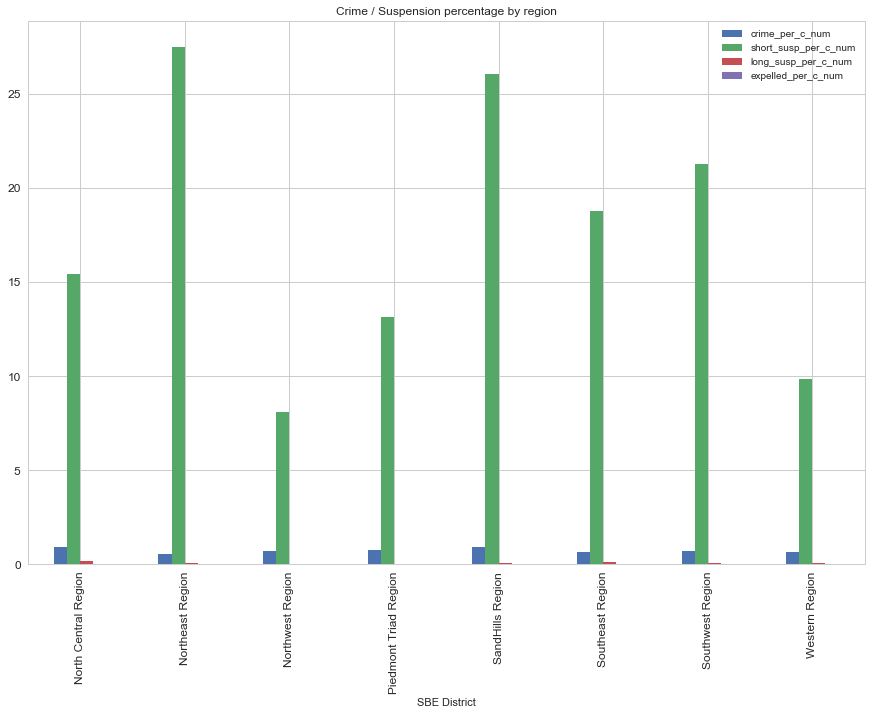

In [73]:
distCrimeSuspData.plot(kind='bar', title ="Crime / Suspension percentage by region", figsize=(15, 10), legend=True, fontsize=12)

### Another closer look at the teachers with 10+ years of experience shows that Northwest has highest count. All other numbers are similar between the regions and we did not find anything interesting. 

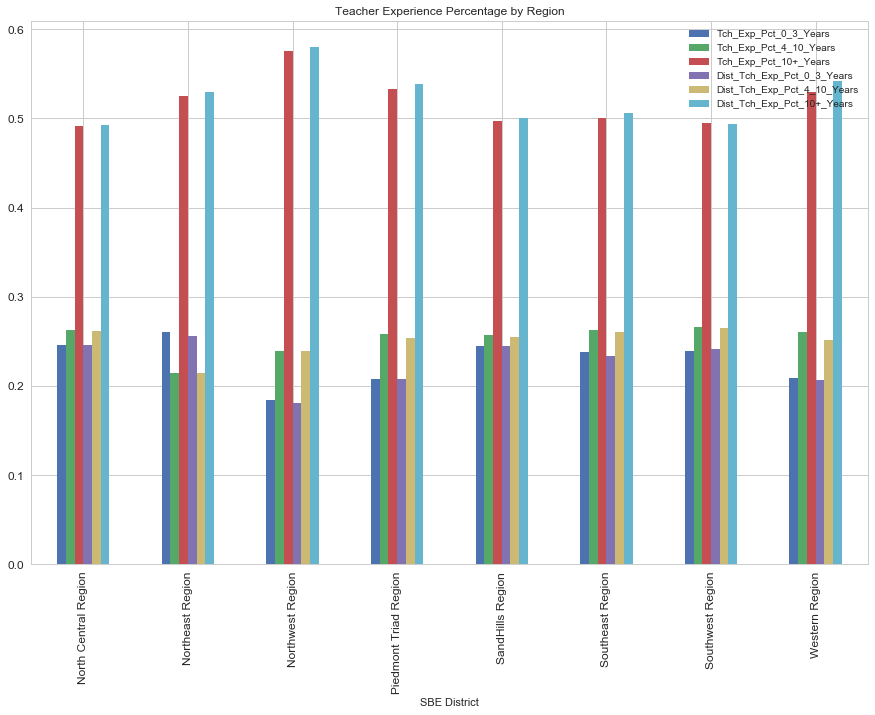

In [74]:
distTeacherExp = schoolData_testRaceRegion[['SBE District', 'Tch_Exp_Pct_0_3_Years','Tch_Exp_Pct_4_10_Years','Tch_Exp_Pct_10+_Years','Dist_Tch_Exp_Pct_0_3_Years','Dist_Tch_Exp_Pct_4_10_Years','Dist_Tch_Exp_Pct_10+_Years']]
distTeacherExpData = (distTeacherExp.groupby(['SBE District']).agg({'Tch_Exp_Pct_0_3_Years':'mean', 'Tch_Exp_Pct_4_10_Years':'mean', 'Tch_Exp_Pct_10+_Years':'mean','Dist_Tch_Exp_Pct_0_3_Years':'mean','Dist_Tch_Exp_Pct_4_10_Years':'mean','Dist_Tch_Exp_Pct_10+_Years':'mean'}))
distTeacherExpData


distTeacherExpData.plot(kind='bar', title ="Teacher Experience Percentage by Region", figsize=(15, 10), legend=True, fontsize=12)

# Visualize relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

## There is very little correlation (0.21 - 0.31) between the SPG & MATH scores and the district level expenses made for the salary, benefits of the teachers and also local expense per pupil at LEA level

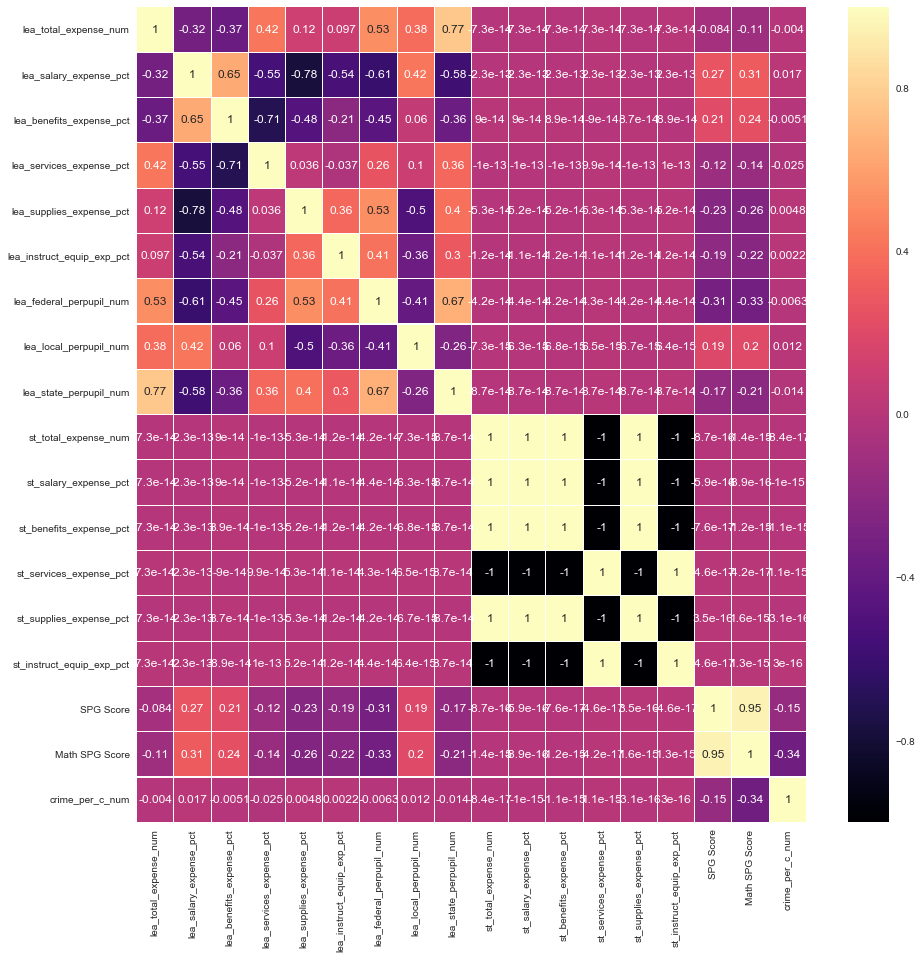

In [75]:
import seaborn as sns

sns.set(style="whitegrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(15, 15))


schoolDataHP1 = schoolData_testRaceRegion[['lea_total_expense_num','lea_salary_expense_pct',
'lea_benefits_expense_pct','lea_services_expense_pct','lea_supplies_expense_pct','lea_instruct_equip_exp_pct',
'lea_federal_perpupil_num','lea_local_perpupil_num','lea_state_perpupil_num',
'st_total_expense_num','st_salary_expense_pct','st_benefits_expense_pct', 'st_services_expense_pct',
'st_supplies_expense_pct','st_instruct_equip_exp_pct','SPG Grade','SPG Score','Reading SPG Grade','Math SPG Grade','Math SPG Score','crime_per_c_num',]]

schoolDataHP1.corr(method = 'pearson')

hm = sns.heatmap(schoolDataHP1.corr(), annot = True, cmap = 'magma', linecolor ='white' , linewidth =0.2)

### Here early on we were trying to put most of the interesting attributes and see how they correlate. we have later plots where we seggregated the features better.

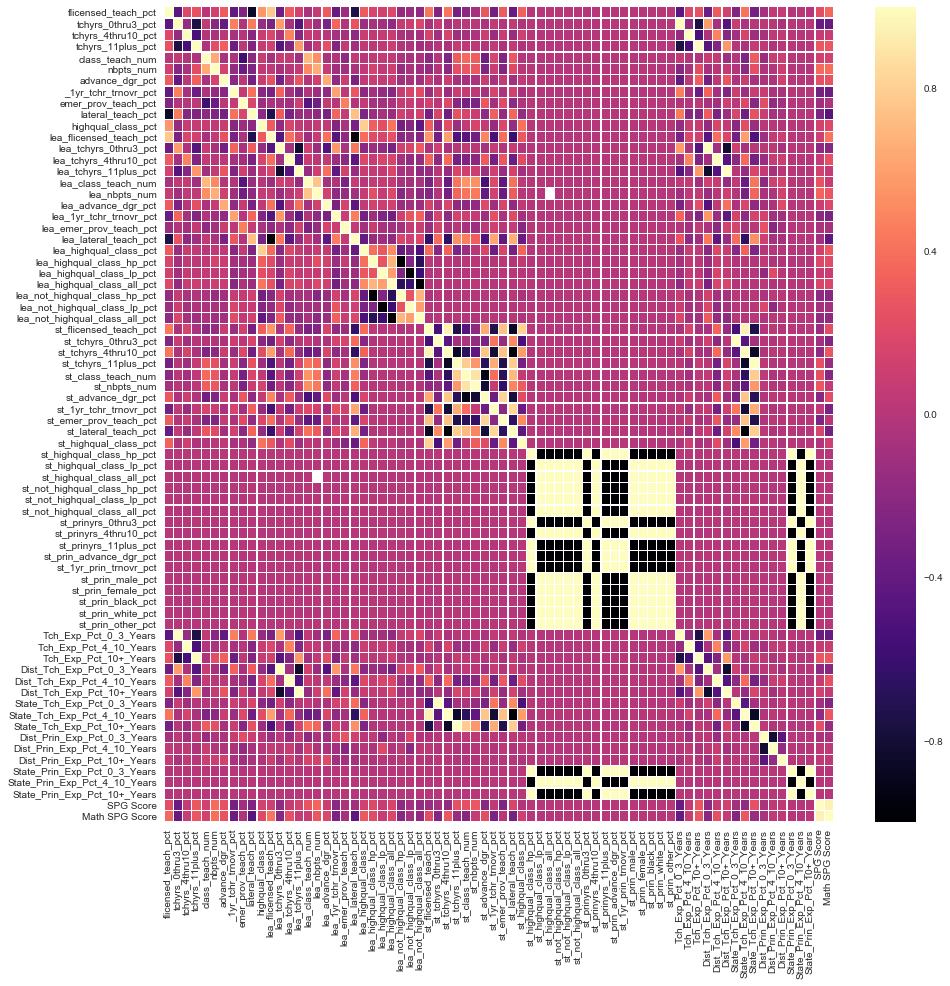

In [76]:
sns.set(style="whitegrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(15, 15))
schoolDataHP2 = schoolData_testRaceRegion[['flicensed_teach_pct','tchyrs_0thru3_pct','tchyrs_4thru10_pct',	'tchyrs_11plus_pct','class_teach_num',
'nbpts_num','advance_dgr_pct','_1yr_tchr_trnovr_pct',	'emer_prov_teach_pct',	'lateral_teach_pct',	'highqual_class_pct',	
'lea_flicensed_teach_pct',	'lea_tchyrs_0thru3_pct',	'lea_tchyrs_4thru10_pct',	'lea_tchyrs_11plus_pct',	'lea_class_teach_num',	
'lea_nbpts_num',	'lea_advance_dgr_pct',	'lea_1yr_tchr_trnovr_pct',	'lea_emer_prov_teach_pct',	'lea_lateral_teach_pct',	'lea_highqual_class_pct',	
'lea_highqual_class_hp_pct',	'lea_highqual_class_lp_pct',	'lea_highqual_class_all_pct',	'lea_not_highqual_class_hp_pct',	'lea_not_highqual_class_lp_pct',	
'lea_not_highqual_class_all_pct',	'st_flicensed_teach_pct',	'st_tchyrs_0thru3_pct',	'st_tchyrs_4thru10_pct',	'st_tchyrs_11plus_pct',	'st_class_teach_num',	
'st_nbpts_num',	'st_advance_dgr_pct',	'st_1yr_tchr_trnovr_pct',	'st_emer_prov_teach_pct',	'st_lateral_teach_pct',	'st_highqual_class_pct',	'st_highqual_class_hp_pct',	
'st_highqual_class_lp_pct',	'st_highqual_class_all_pct',	'st_not_highqual_class_hp_pct',	'st_not_highqual_class_lp_pct',	'st_not_highqual_class_all_pct',	
'st_prinyrs_0thru3_pct',	'st_prinyrs_4thru10_pct',	'st_prinyrs_11plus_pct',	'st_prin_advance_dgr_pct',	'st_1yr_prin_trnovr_pct',	'st_prin_male_pct',	
'st_prin_female_pct',	'st_prin_black_pct',	'st_prin_white_pct',	'st_prin_other_pct',	'Tch_Exp_Pct_0_3_Years',	'Tch_Exp_Pct_4_10_Years',	
'Tch_Exp_Pct_10+_Years',	'Dist_Tch_Exp_Pct_0_3_Years',	'Dist_Tch_Exp_Pct_4_10_Years',	'Dist_Tch_Exp_Pct_10+_Years',	'State_Tch_Exp_Pct_0_3_Years',	
'State_Tch_Exp_Pct_4_10_Years',	'State_Tch_Exp_Pct_10+_Years',	'Dist_Prin_Exp_Pct_0_3_Years',	'Dist_Prin_Exp_Pct_4_10_Years',	'Dist_Prin_Exp_Pct_10+_Years',	
'State_Prin_Exp_Pct_0_3_Years',	'State_Prin_Exp_Pct_4_10_Years',	'State_Prin_Exp_Pct_10+_Years','SPG Grade','SPG Score','Reading SPG Grade','Math SPG Grade','Math SPG Score',]]
schoolDataHP2.corr(method = 'pearson')
hms = sns.heatmap(schoolDataHP2.corr(), annot = False, cmap = 'magma', linecolor ='white' , linewidth =0.2)

## Focusing on the Northeast region teacher qualification and the performance metric (SPG Score), we get the following heatmap below. 

## We noticed high correlation between emer_prov_teach_pct / lea_emer_prov_teach_pct  and the SPG scores. The _1yr_tchr_trnovr_pct rate has a negative correlation with the SPG scores. 

## The flicensed_teach_pct and lea_flicensed_teach_pct has a moderate correlation with SPG score. The availability of Emergency Provisional teacher seems to produce better SPG scores for Northeast region. Licenced teachers seems to produce better SPG scores for Northeast region


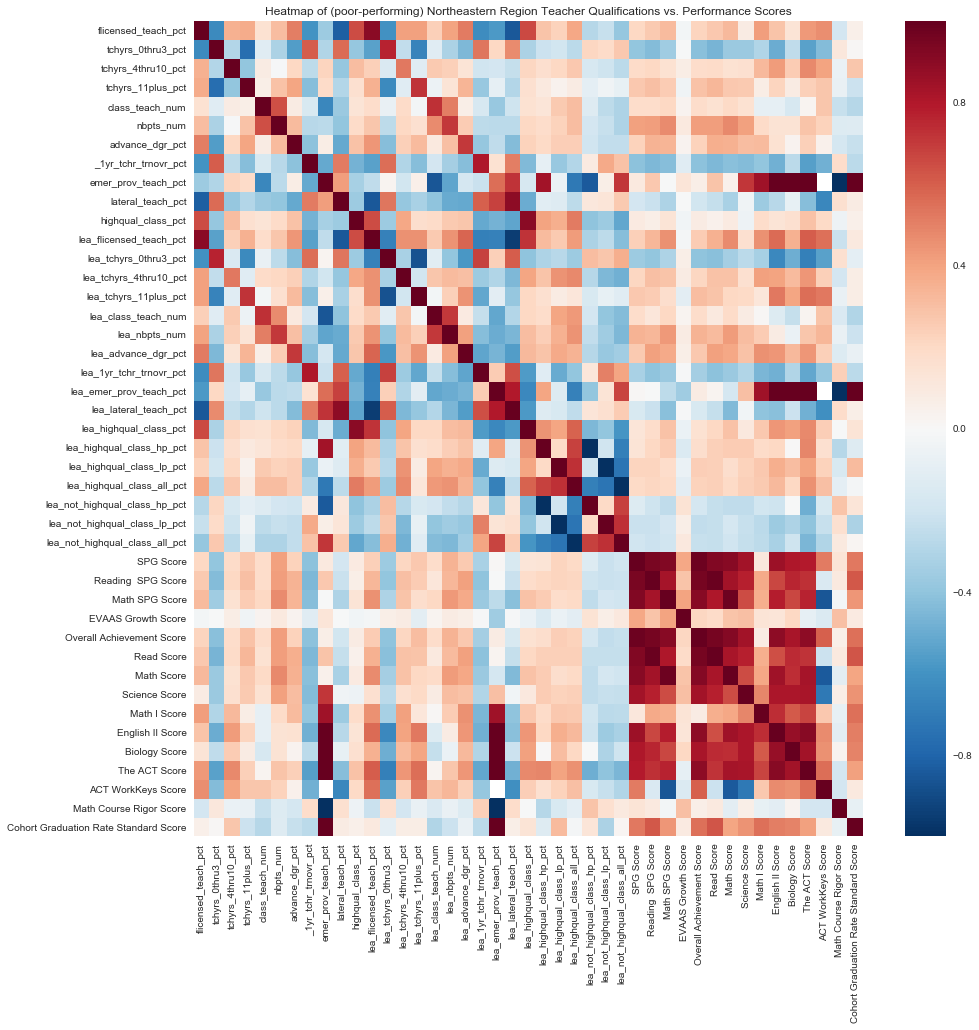

In [77]:
#aliasing completely merged dataframe from the previous merging script 'NC_Educ_Data_All_Merge.py'
all_df = schoolData_testRaceRegion

#subsetting data from the two districts of interest
all_df_NE = all_df[all_df['SBE District'] == 'Northeast Region']
all_df_W = all_df[all_df['SBE District'] == 'Western Region']

#expenditures variable list
exp_list = ['lea_total_expense_num','lea_salary_expense_pct','lea_benefits_expense_pct','lea_services_expense_pct',
'lea_supplies_expense_pct','lea_instruct_equip_exp_pct']

#teacher qualifications variable list
teach_list = ['flicensed_teach_pct', 'tchyrs_0thru3_pct', 'tchyrs_4thru10_pct', 'tchyrs_11plus_pct', 'class_teach_num', 'nbpts_num', 'advance_dgr_pct',
'_1yr_tchr_trnovr_pct', 'emer_prov_teach_pct', 'lateral_teach_pct', 'highqual_class_pct', 'lea_flicensed_teach_pct',
'lea_tchyrs_0thru3_pct', 'lea_tchyrs_4thru10_pct', 'lea_tchyrs_11plus_pct', 'lea_class_teach_num', 'lea_nbpts_num', 'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct', 'lea_emer_prov_teach_pct', 'lea_lateral_teach_pct', 'lea_highqual_class_pct', 'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct', 'lea_highqual_class_all_pct', 'lea_not_highqual_class_hp_pct', 'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct']

#performance scores list
grade_list = ['SPG Score', 'Reading  SPG Score', 'Math SPG Score', 'EVAAS Growth Score', 'Overall Achievement Score', 'Read Score', 'Math Score',
'Science Score', 'Math I Score', 'English II Score', 'Biology Score', 'The ACT Score', 'ACT WorkKeys Score', 'Math Course Rigor Score',
'Cohort Graduation Rate Standard Score']

#concatenating lists for comparative heatmaps
hm_list = teach_list + grade_list


#(remember to import seaborn as sns)

#NE region teacher qualification vs. performance scores heatmap
fig, ax = plt.subplots(figsize=(15,15))
hm_corr = all_df_NE[hm_list].corr()
sns.heatmap(hm_corr, ax=ax)
ax.set_title('Heatmap of (poor-performing) Northeastern Region Teacher Qualifications vs. Performance Scores');



## we visualised all the teacher experience related parameters with the SPG score, these are the parameters that had about 0.2 - 0.34 correlation with the score. 

## The percentage of teachers with 0-3 years experience has a negative corelation with SPG scores, percentage of teachers with 4-10 years experience has moderate corelation with SPG scores and percentage of teachers with 11+ years experience has a moderate - high corelation with SPG scores. Teacher's experience seem to impact the SPG scores at the Western Regions schools.  

## Advanced degree percentage and highly qualified teachers percentage has positive corelation with SPG scores. The percentage of no highly qualified teachers has negative corealtion with SPG scores. This shows that the availability of highly qualified teachers / advanced degree teachers at Western Regions schools has impact on the SPG scores. Lateral teacher percentage also has a positive corelation with SPG scores. 

### lea_highqual_class_all_pct - Percent of classes taught by highly qualified teachers in all schools at LEA level
### lea_highqual_class_pct - Average highly qualified classes at LEA level
### lea_nbpts_num - Average number of National Board Certified staff at LEA level
### lea_tchyrs_11plus_pct- teachers with 11 years of experience
### lateral_teach_pct - lateral entry teacher percentage at school level
### advance_dgr_pct - Percent of teachers with masters or higher degree at school level

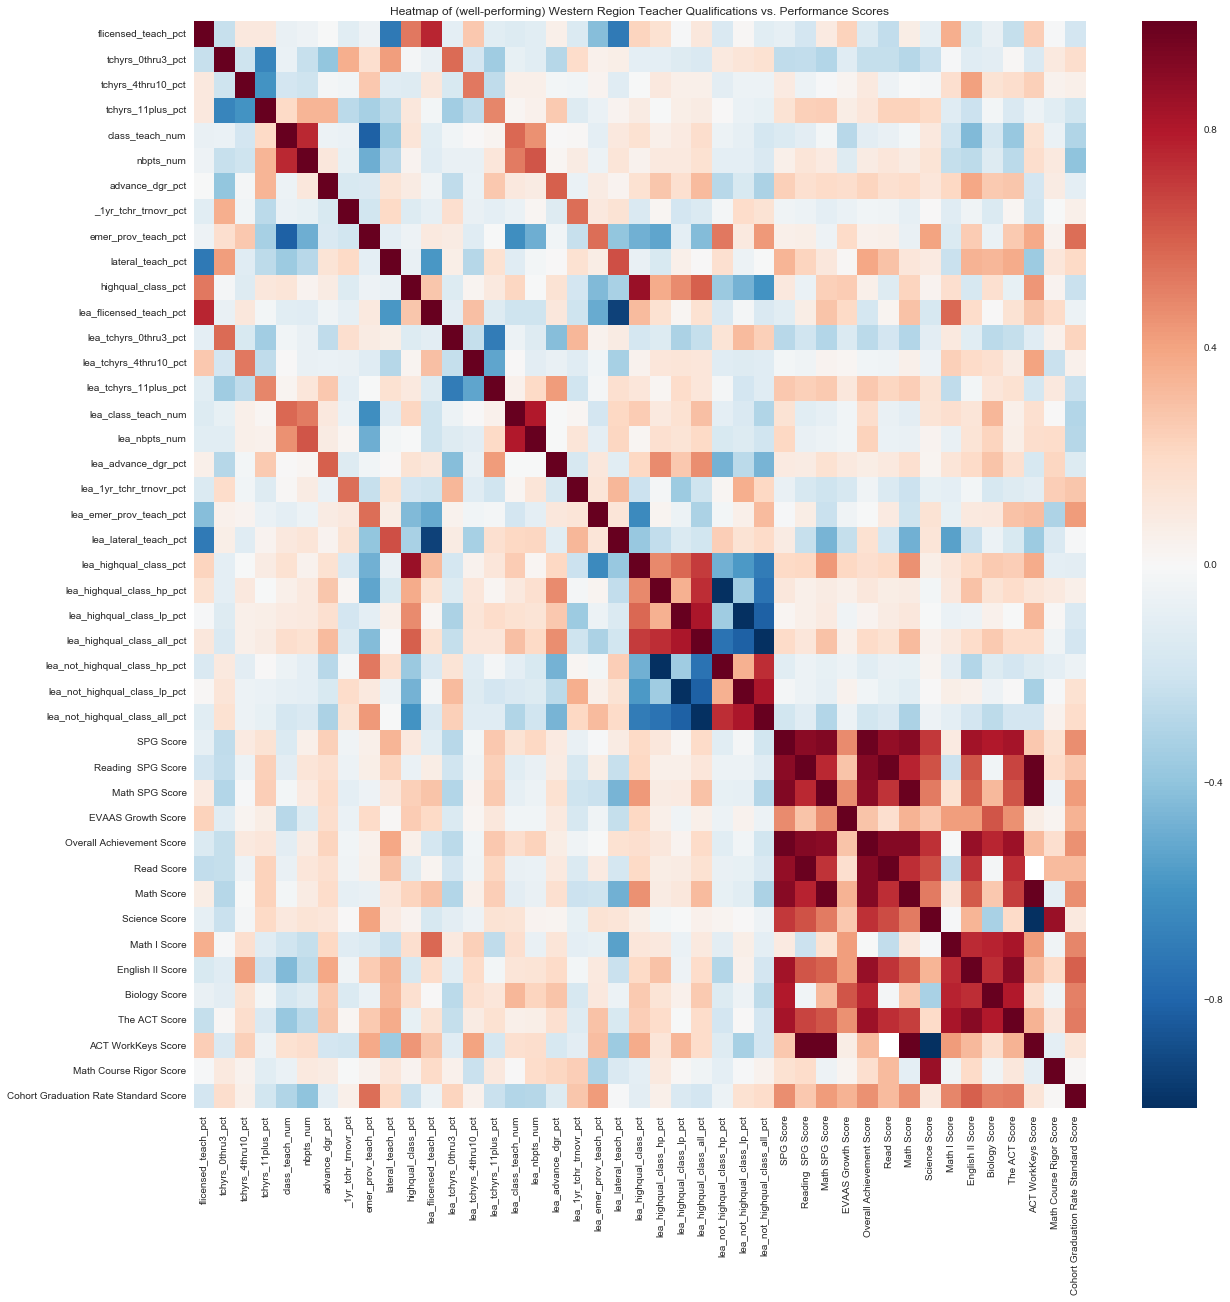

In [78]:
#Western region teacher qualification vs. performance scores heatmap
fig2, ax2 = plt.subplots(figsize=(20,20))
hm_corr2 = all_df_W[hm_list].corr()
sns.heatmap(hm_corr2, ax=ax2)
ax2.set_title('Heatmap of (well-performing) Western Region Teacher Qualifications vs. Performance Scores');



# Wester Region vs Northeastern Region.

## Wester Region: 
## Salary expenses percent has a positive corelation with SPG scores.  Expense on service supplies and instructional equipments does not have a positive impact on SPG scores. 

## Northeastern Region:
## Salary expenses percent has a strong positive corelation with SPG scores. Expense on service supplies and instructional equipments  does not have a positive impact on SPG scores. 

## Salary expenses in general has positive impact the SPG scores.
## Spending more on supplies/equipments does not seem to have a positive impact on the SPG scores.

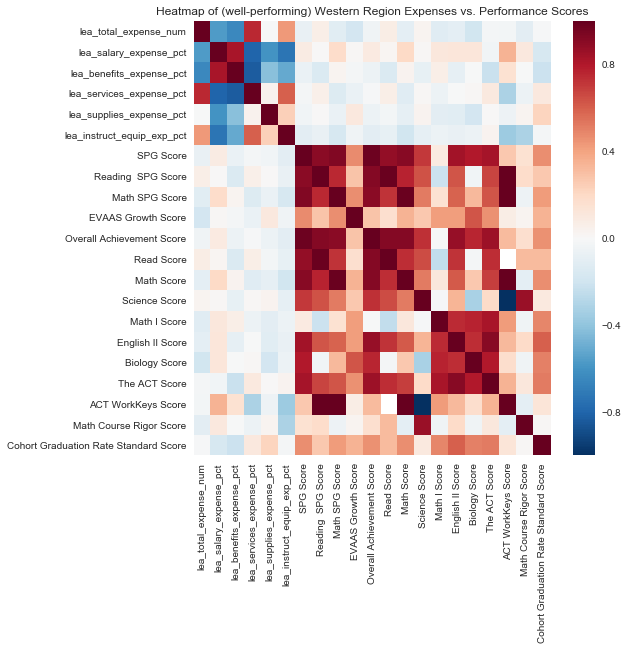

In [79]:
#Western region expenditures vs. performance scores heatmap

hm_list2 = exp_list + grade_list


fig3, ax3 = plt.subplots(figsize=(8,8))
hm_corr3 = all_df_W[hm_list2].corr()
sns.heatmap(hm_corr3, ax=ax3)
ax3.set_title('Heatmap of (well-performing) Western Region Expenses vs. Performance Scores');



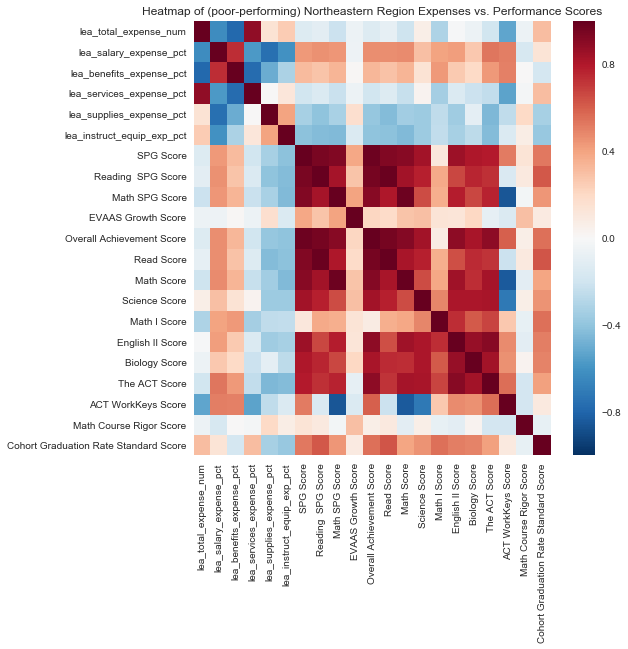

In [80]:
#NE region expenditures vs. performance scores heatmap

hm_list2 = exp_list + grade_list


fig4, ax4 = plt.subplots(figsize=(8,8))
hm_corr4 = all_df_NE[hm_list2].corr()
sns.heatmap(hm_corr4, ax=ax4)
ax4.set_title('Heatmap of (poor-performing) Northeastern Region Expenses vs. Performance Scores');

# New Features

### At this point we have analyzed many differences with region based data. We are interested in doing more analysis on th economic / demographic data at a region level. Poverty, Unemployement, Parents education, High economic zones.
### We will be discussing with Prof. Drew in the future about the difference between the regions, races and economic status.

# Exceptional Work - PCA and Google Facets

## PCA

### After identifying differences between the Western and Northeastern Regions in SPG Scores, we decided to take a closer look by applying principal component analysis to the expenditure and teacher qualification variables of interest.

### After subsetting the data for the two regions, it was preprocessed with Scikit-Learn to scale the data and mean impute remaining missing values. Plots of the first two principal component loadings were generated. The scatterplot showed greater separation along the axis of the first PC loading, registering high (positive) values for the Northeastern Region, and low (negative) values for the Western Region.

#### These differences are registered on the first principal component loading in the heatmap. Variables which registered differences between the high-performing Western Region and the low-performing Northeastern Region included: 

##### 1) those relating to teacher licensing, certifications, and the possession of advanced degrees (lea_nbpts_num, lea_advance_dgr_pct, lea_flicensed_teach_pct);

##### 2) those indicating level of teacher experience and the quality of classes at the district level (tchyrs_0thru3_pct, lea_tchyrs_0thru3_pct, lea_highqual_class_pct, lea_highqual_class_hp_pct, lea_highqual_class_all_pct, lea_not_highqual_class_lp_pct, lea_not_highqual_class_all_pct); 

##### 3) those registering teacher turnover rate and alternative routes to credentialing(_1yr_tchr_trnover_pct, emer_prov_teach_pct, lateral_teach_pct, lea_1yr_tchr_trnovr_pct, lea_emer_prov_teach_pct, lea_lateral_teach_pct); and

##### 4) those relating to expenditures on salary and benefits (lea_benefits_expense_pct, lea_salary_expense_pct).

### These findings were consistent with what was identified in the pairwise heatmap comparison of differences between the Northeastern and Western regions as they pertain to performance metrics like SPG Scores.

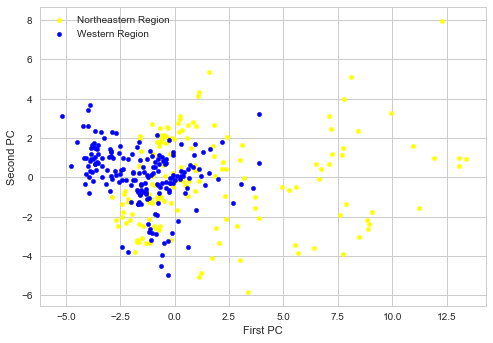

In [81]:
pc_list_nogrades = teach_list + exp_list + ['SBE District']

#concatenate the Northeastern and Western Region dataframes; check for correct shape
df_WandNE = pd.concat([all_df_NE,all_df_W],axis=0)
#df_WandNE.shape

#cast region label to categorical type for integer coding; used below for PCA
df_WandNE['SBE District'] = df_WandNE['SBE District'].astype('category')
df_WandNE['SBE District'] = df_WandNE['SBE District'].cat.codes

#check value counts; Western Region coded to integer '1', Northeastern Region coded to integer '0'
#df_WandNE['SBE District'].value_counts()

#subset concatenated Western and Northeastern Region data with list of variable names of interest; check for correct shape
#pc_df = df_WandNE[pc_list]
#pc_df.shape

pc_df_nogrades = df_WandNE[pc_list_nogrades]

#create flattened dataframe of variable names in the PC list (and check shape); used in PCA below
#flatten_pc_list = pd.DataFrame({'vars':pc_list})
flatten_pc_list = pd.DataFrame({'vars':pc_list_nogrades})
flat_pc_list = flatten_pc_list.values.flatten()
#flat_pc_list.shape

#mean impute NAs of columns used in PCA
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
#imp.fit(pc_df)
#imp_data = imp.transform(pc_df)
imp.fit(pc_df_nogrades)
imp_data = imp.transform(pc_df_nogrades)

#after imputation, scale all the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(imp_data)
scaled_data = scaler.transform(imp_data)

#perform PCA on scaled data, identifying 6 components; check for correct shape
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
#scaled_data.shape

#plot first two PCs to compare the two regions; note the separation!
pc_1 = x_pca[:,0] #first PC values
pc_2 = x_pca[:,1] #second PC values
pc_region = pc_df_nogrades['SBE District'] #setting region values to temporar variable; necessary for color-coded plot legend
test_pc_df = pd.DataFrame(dict(c0=pc_1,c1=pc_2,c2=pc_region)) #temporary dataframe that combines the first two PC values and the region values; necessary for color-coded plot legend

colors = {1:'blue',0:'yellow'} #map colors to categorical coding of the two regions; 1 = Western Region, 2 = Northeastern Region

#plot PC1 as X, PC2 as Y, using the color mapping of the two regions
fig,ax = plt.subplots()
for key,group in test_pc_df.groupby('c2'):
    group.plot.scatter(ax=ax,x='c0',y='c1',label=key,color=colors[key])

#rename the x and y axis labels
plt.xlabel('First PC')
plt.ylabel('Second PC')

#grab the legend and reset the text of the labels to the corresponding regions; Western = blue, Northeastern = yellow
L = plt.legend()
L.get_texts()[0].set_text('Northeastern Region')
L.get_texts()[1].set_text('Western Region')

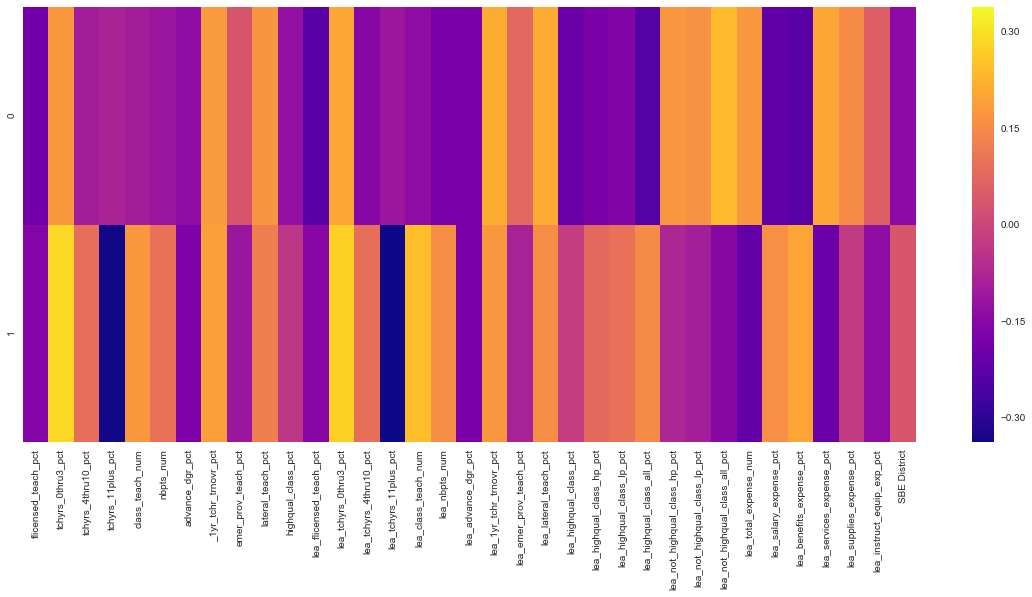

In [82]:
#create dataframe of PC profiles and their corresponding variable names (from the flattened pc_list above)
df_comp = pd.DataFrame(pca.components_,columns=flat_pc_list)

#check PC profiles if desired
#with pd.option_context('display.max_columns', None):
#    print(df_comp)

#heatmap of profiles for the six PCs
plt.figure(figsize=(20,8))
sns.heatmap(df_comp,cmap='plasma')

# Google Facets

### we  exported all the datasets into a single csv  and uploaded this into google facets and tried to explore.

### we ran out of time so could only check out the regional racial split.

### Most of the Asian_RACE students belong to the schools that have higher SPG Scores , the blue circles represent the Asian_RACE

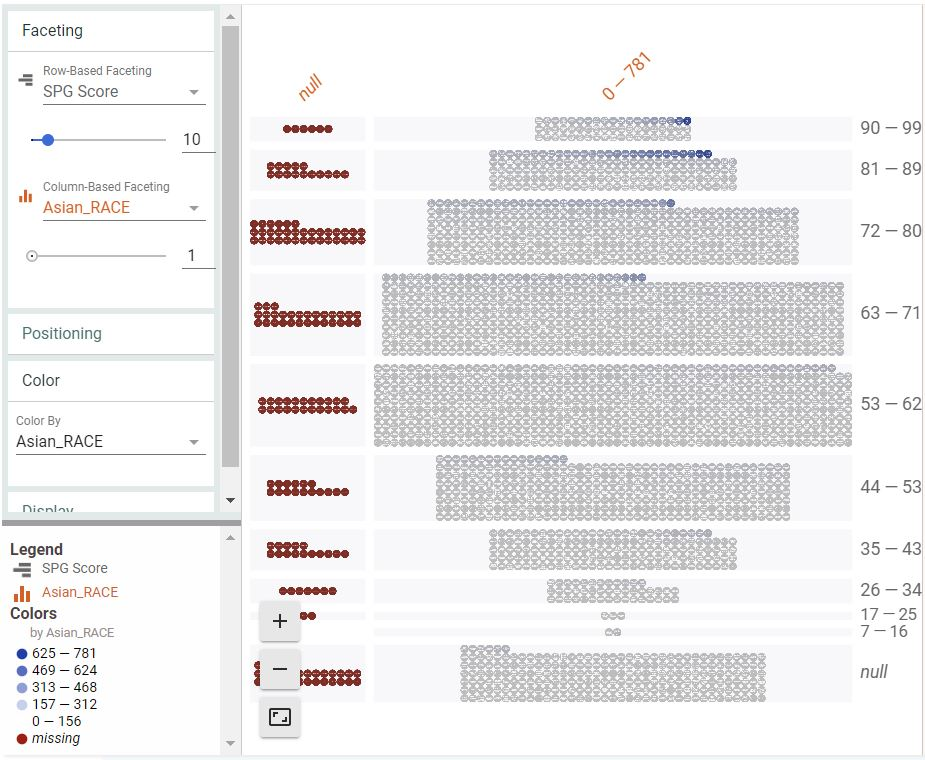

## Here the blue circles show the White_RACE majority. As we move from lower performing schools to the higher performing ones, we see the white_RACE majority ratio also increases.

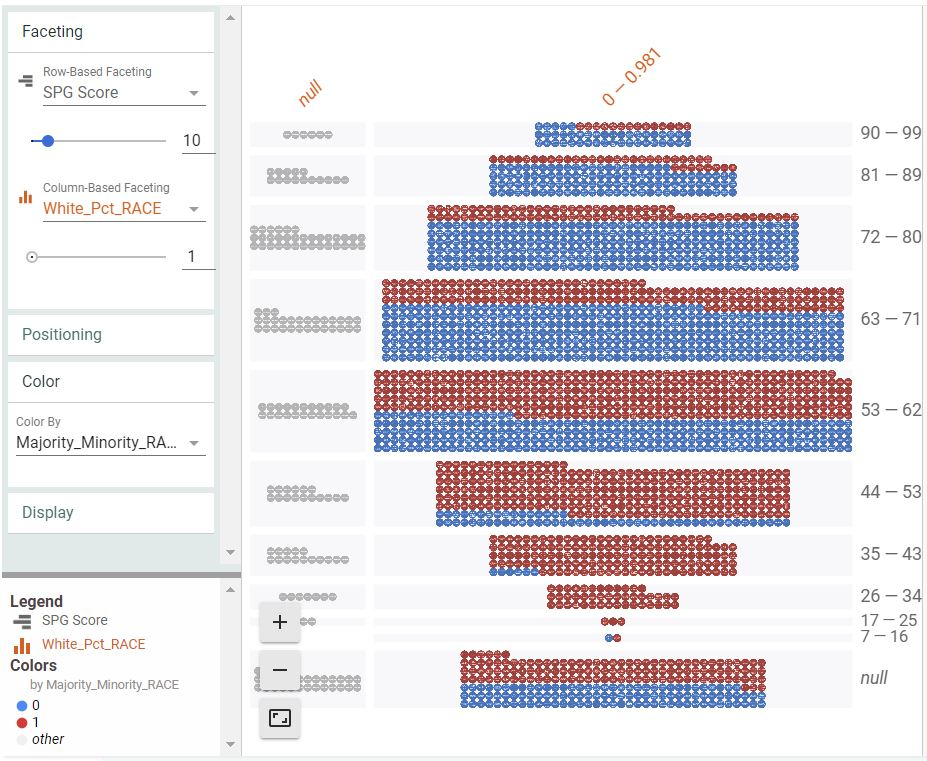

## References:

North Carolina Data http://www.ncpublicschools.org/src/researchers/<br />
Professor Jake's Data https://github.com/jakemdrew/EducationDataNC<br />
SPG Info http://www.ncpublicschools.org/docs/accountability/reporting/spgbckgrndpack15.pdf<br />